### IMPORT

In [58]:
import matplotlib.pyplot as plt; import numpy as np; import netCDF4; from netCDF4 import Dataset
import pandas as pd; import numpy.ma as ma; import time as timeit; import os; import math
import itertools; import scipy.io; import mat73; import collections
import cartopy; import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import AutoMinorLocator; from matplotlib.ticker import FixedLocator
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
%matplotlib inline
import statistics; import xarray as xr

### REGION OF INTEREST

In [2]:
v = open("bndmbs.txt", "r", encoding="utf-8")
v.read()
v = '  37.00   76.00\n  36.00   75.50\n  35.50   75.00\n  36.00   74.75\n  37.40   74.50\n  39.50   72.00\n  40.50   74.00\n  39.40   74.25\n  37.00   76.00\n'
output1v = v.split('\n')

newv = [] 
for string in output1v:
    output2v = string.split(' ')
    newv.append(output2v)

newv = [['', '', '37.00', '', '', '76.00'], ['', '', '36.00', '', '', '75.50'], ['', '', '35.50', '', '', '75.00'], ['', '', '36.00', '', '', '74.75'], ['', '', '37.40', '', '', '74.50'], ['', '', '39.50', '', '', '72.00'], ['', '', '40.50', '', '', '74.00'], ['', '', '39.40', '', '', '74.25'], ['', '', '37.00', '', '', '76.00']]
lon_v = []; lat_v = []

for i in range(9): 
    v1 = newv[i][2]
    lat_v.append(v1)
    v3 = newv[i][5]
    lon_v.append(v3)
lonlist_v = [float(i) for i in lon_v]; latlist_v = [float(i) for i in lat_v]
df_v = pd.DataFrame({'lon': lonlist_v, 'lat': latlist_v,})


lonlist_v_plot = [float(i)*-1 for i in lon_v]; latlist_v = [float(i) for i in lat_v]
df_v_plot = pd.DataFrame({'lon': lonlist_v_plot, 'lat': latlist_v,})
x_v = df_v_plot['lon']; y_v = df_v_plot['lat']

In [3]:
print(df_v_plot)
print(df_v_plot.values)

     lon   lat
0 -76.00  37.0
1 -75.50  36.0
2 -75.00  35.5
3 -74.75  36.0
4 -74.50  37.4
5 -72.00  39.5
6 -74.00  40.5
7 -74.25  39.4
8 -76.00  37.0
[[-76.    37.  ]
 [-75.5   36.  ]
 [-75.    35.5 ]
 [-74.75  36.  ]
 [-74.5   37.4 ]
 [-72.    39.5 ]
 [-74.    40.5 ]
 [-74.25  39.4 ]
 [-76.    37.  ]]


In [4]:
polygon_verts = Polygon(df_v.values)
print(polygon_verts)

POLYGON ((76 37, 75.5 36, 75 35.5, 74.75 36, 74.5 37.4, 72 39.5, 74 40.5, 74.25 39.4, 76 37))


In [5]:
polygon_v = Polygon(df_v.values.tolist())
print(polygon_v)

POLYGON ((76 37, 75.5 36, 75 35.5, 74.75 36, 74.5 37.4, 72 39.5, 74 40.5, 74.25 39.4, 76 37))


In [20]:
filelen = []; years = []
Bottles = []; MK3 = []
SBE17 = []; SBE19 = []
MK5 = []; SBE19V2 = []
SBE911 = []; SBE19plus = []

for year in range(1978,2020):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; yd_intermediate = [];gear_intermediate = []
    Bottles_intermediate = []; MK3_intermediate = []
    SBE17_intermediate = []; SBE19_intermediate = []
    MK5_intermediate = []; SBE19V2_intermediate = []
    SBE911_intermediate = []; SBE19plus_intermediate = []
        
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        gear = npfile[i]['gear']
        if yd > 59 and yd <= 151:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            yd_intermediate.append(npfile[i]['yd'])
            gear_intermediate.append(npfile[i]['gear'])
            
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'gear': gear_intermediate})
#     print(month_df)
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if polygon_v.contains(point) == True:
            a = month_df['gear'].iloc[ii]
#             print(a)
            if a == 'Bottle':
                Bottles_intermediate.append(i)
            if a == 'MK-3':
                MK3_intermediate.append(i)
            if a == 'SBE-17':
                SBE17_intermediate.append(i)
            if a == 'SBE-19':
                SBE19_intermediate.append(i)
            if a == 'MK-5':
                MK5_intermediate.append(i)
            if a == 'SBE-19+V2':
                SBE19V2_intermediate.append(i)
            if a == 'SBE-911+':
                SBE911_intermediate.append(i)
            if a == 'SBE-19+':
                SBE19plus_intermediate.append(i)
    Bottles.append(len(Bottles_intermediate))
    MK3.append(len(MK3_intermediate))
    SBE17.append(len(SBE17_intermediate))
    SBE19.append(len(SBE19_intermediate))
    MK5.append(len(MK5_intermediate))
    SBE19V2.append(len(SBE19V2_intermediate))
    SBE911.append(len(SBE911_intermediate))
    SBE19plus.append(len(SBE19plus_intermediate))

In [130]:
years = [1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


In [22]:
df = pd.DataFrame(index=years, 
                  data={'Bottle': Bottles,'MK-3': MK3, 
                        'SBE-17': SBE17,'SBE-19': SBE19,
                        'SBE-19+V2': SBE19V2,'SBE-911+': SBE911,
                        'SBE-19+': SBE19plus,'MK-5': MK5})

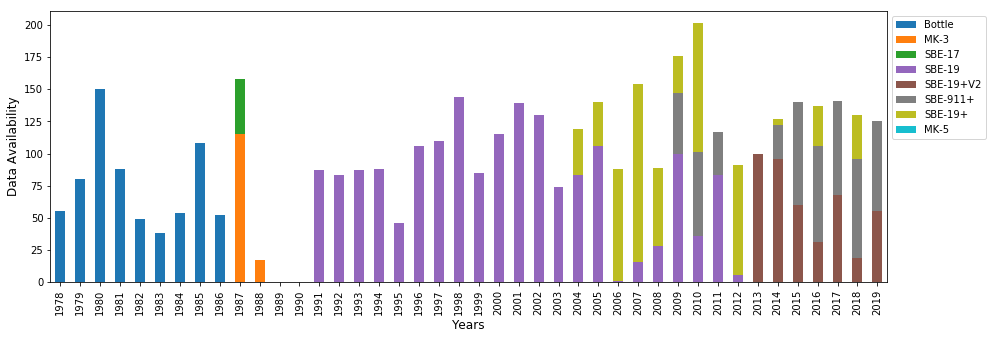

In [23]:
ax = df.plot(kind="bar", stacked=True, cmap = 'tab10')
plt.gcf().set_size_inches(15, 5)
# plt.title('Data Collection Methods', fontsize = 20)
plt.xlabel('Years',fontsize=12); plt.ylabel('Data Availability',fontsize=12)
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

In [145]:
finaldepth = []; finallat = [];finallon = []
for year in range(1977,2020):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; p_intermediate = []; t_intermediate = []; yd_intermediate = []
    seasonyeardepth = []; seasonyeartemp = []; counterii = []
        
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        lon = npfile[i]['lon']
        lat = npfile[i]['lat']
        floordepth = npfile[i]['depth']
        
#         if yd > 334 and yd <= 365 or yd >= 0 and yd <= 59:
        if yd > 59 and yd <= 151:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
            
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate})
    
#     print(newdf)
    
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if isinstance(month_df['p'].iloc[ii], int) or isinstance(month_df['p'].iloc[ii], float) or isinstance(month_df['t'].iloc[ii], int) or isinstance(month_df['t'].iloc[ii], float):
#         if type(month_df['p'].iloc[ii]) != int or type(month_df['p'].iloc[ii]) != float or type(month_df['t'].iloc[ii]) != int or type(month_df['t'].iloc[ii]) != float:
            pass
        elif polygon_v.contains(point) == True:
#             print(ii)
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'t': month_df['t'].iloc[ii]}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            l=[i for i in df_final[0] if i<=6]
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for iii in range(len(l)):
                    val = df_final[1][iii]
                    numrange.append(iii)
                    surfaceval.append(val)
            surfacevalmean = statistics.mean(surfaceval)
#             print(surfacevalmean)
#             print(ii)
#             print(lat,lon)
            tempfin = []
            pressurefin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
            d = {'temp': list(reversed(tempfin)), 'pressure': list(reversed(pressurefin))}
            dffin = pd.DataFrame(d)
#             pnew = []; allmixedcount = []
#             inconclusivecount = []
            for ix in range(len(dffin)):
                b = dffin.at[ix,'temp']
                if b <= (surfacevalmean + 0.2) and b >= (surfacevalmean - 0.2):
                    if dffin.at[ix,'pressure'] >= floordepth - 6:
                        seasonyeartemp.append(dffin.at[ix,'temp'])
                        seasonyeardepth.append(dffin.at[ix,'pressure'])
#                         print(i,ii,iii,ix)
#                         print(newdf.iloc[ii])
                        counterii.append(ii)
                    elif dffin.at[ix,'pressure'] == df_final[0].iloc[-1]:
                        pass
                    else:
#                         pnew.append(dffin.at[ix,'pressure'])
                        seasonyeartemp.append(dffin.at[ix,'temp'])
                        seasonyeardepth.append(dffin.at[ix,'pressure'])
                        np.array(seasonyeartemp)
                        np.array(seasonyeardepth)
#                         print(i,ii,iii,ix)
#                         print(newdf.iloc[ii])
                        counterii.append(ii)
                    break  
#     if len(seasonyeartemp) > 0:
#         print(counterii)
    inlat = []; inlon = []
    for timer in counterii:
#         print(newdf['lat'][timer])
        inlat.append(newdf['lat'][timer])
        inlon.append(newdf['lon'][timer])
    dfplots = pd.DataFrame(list(zip(seasonyeardepth, inlat,inlon)),columns = ['depth','lat','lon'])
#     print('depth_',year,'=', seasonyeardepth)

    finaldepth.append(seasonyeardepth)
    finallat.append(inlat)
    finallon.append(inlon)
#     print('lat_',year,'=', inlat)
#     print('lon_',year,'=', inlon)
#     print(dfplots)
#         print('depth_',year,np.mean(seasonyeardepth))

In [25]:
finaldepth = []; finallat = [];finallon = []
for year in range(1977,2004):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; p_intermediate = []; t_intermediate = []; yd_intermediate = []
    seasonyeardepth = []; seasonyeartemp = []; counterii = []
        
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        lon = npfile[i]['lon']
        lat = npfile[i]['lat']
        floordepth = npfile[i]['depth']
        
#         if yd > 334 and yd <= 365 or yd >= 0 and yd <= 59:
        if yd > 243 and yd <= 334:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
            
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate})
    
#     print(newdf)
    
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        print(new)
        print(type(new))
        point = Point(new)
        print(point)
        if polygon_v.contains(point) == True:
#             print(ii)
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'t': month_df['t'].iloc[ii]}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            l=[i for i in df_final[0] if i<=6]
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for iii in range(len(l)):
                    val = df_final[1][iii]
                    numrange.append(iii)
                    surfaceval.append(val)
            surfacevalmean = statistics.mean(surfaceval)
#             print(surfacevalmean)
#             print(ii)
#             print(lat,lon)
            tempfin = []
            pressurefin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
            d = {'temp': list(reversed(tempfin)), 'pressure': list(reversed(pressurefin))}
            dffin = pd.DataFrame(d)
#             pnew = []; allmixedcount = []
#             inconclusivecount = []
            for ix in range(len(dffin)):
                b = dffin.at[ix,'temp']
                if b <= (surfacevalmean + 0.2) and b >= (surfacevalmean - 0.2):
                    if dffin.at[ix,'pressure'] >= floordepth - 6:
                        seasonyeartemp.append(dffin.at[ix,'temp'])
                        seasonyeardepth.append(dffin.at[ix,'pressure'])
#                         print(i,ii,iii,ix)
#                         print(newdf.iloc[ii])
                        counterii.append(ii)
                    elif dffin.at[ix,'pressure'] == df_final[0].iloc[-1]:
                        pass
                    else:
#                         pnew.append(dffin.at[ix,'pressure'])
                        seasonyeartemp.append(dffin.at[ix,'temp'])
                        seasonyeardepth.append(dffin.at[ix,'pressure'])
                        np.array(seasonyeartemp)
                        np.array(seasonyeardepth)
#                         print(i,ii,iii,ix)
#                         print(newdf.iloc[ii])
                        counterii.append(ii)
                    break  
#     if len(seasonyeartemp) > 0:
#         print(counterii)
    inlat = []; inlon = []
    for timer in counterii:
#         print(newdf['lat'][timer])
        inlat.append(newdf['lat'][timer])
        inlon.append(newdf['lon'][timer])
    dfplots = pd.DataFrame(list(zip(seasonyeardepth, inlat,inlon)),columns = ['depth','lat','lon'])
#     print('depth_',year,'=', seasonyeardepth)

    finaldepth.append(seasonyeardepth)
    finallat.append(inlat)
    finallon.append(inlon)
#     print('lat_',year,'=', inlat)
#     print('lon_',year,'=', inlon)
#     print(dfplots)
#         print('depth_',year,np.mean(seasonyeardepth))

[75.2333 35.2667]
<class 'numpy.ndarray'>
POINT (75.2333 35.2667)
[75.25   35.4667]
<class 'numpy.ndarray'>
POINT (75.25 35.4667)
[74.9667 35.6667]
<class 'numpy.ndarray'>
POINT (74.9667 35.6667)
[75.4667 35.85  ]
<class 'numpy.ndarray'>
POINT (75.4667 35.85)
[75.1    36.1333]
<class 'numpy.ndarray'>
POINT (75.09999999999999 36.1333)
[75.5333 36.2333]
<class 'numpy.ndarray'>
POINT (75.5333 36.2333)
[75.     36.4833]
<class 'numpy.ndarray'>
POINT (75 36.4833)
[75.7833 36.5333]
<class 'numpy.ndarray'>
POINT (75.7833 36.5333)
[75.3667 36.7   ]
<class 'numpy.ndarray'>
POINT (75.36669999999999 36.7)
[74.8667 36.6333]
<class 'numpy.ndarray'>
POINT (74.86669999999999 36.6333)
[74.3333 36.7333]
<class 'numpy.ndarray'>
POINT (74.33329999999999 36.7333)
[74.5667 36.7667]
<class 'numpy.ndarray'>
POINT (74.5667 36.7667)
[74.8167 36.8   ]
<class 'numpy.ndarray'>
POINT (74.8167 36.8)
[75.1    36.8333]
<class 'numpy.ndarray'>
POINT (75.09999999999999 36.8333)
[75.3167 36.8667]
<class 'numpy.ndarray'>

POINT (67.7 42.6)
[67.45   42.6667]
<class 'numpy.ndarray'>
POINT (67.45 42.6667)
[67.7    42.9667]
<class 'numpy.ndarray'>
POINT (67.7 42.9667)
[68.1333 43.3833]
<class 'numpy.ndarray'>
POINT (68.13330000000001 43.3833)
[67.7167 43.8167]
<class 'numpy.ndarray'>
POINT (67.7167 43.8167)
[67.4333 43.7   ]
<class 'numpy.ndarray'>
POINT (67.4333 43.7)
[67.  43.5]
<class 'numpy.ndarray'>
POINT (67 43.5)
[66.3333 43.5333]
<class 'numpy.ndarray'>
POINT (66.33329999999999 43.5333)
[66.7833 43.1833]
<class 'numpy.ndarray'>
POINT (66.7833 43.1833)
[66.3333 43.0167]
<class 'numpy.ndarray'>
POINT (66.33329999999999 43.0167)
[66.95   42.7167]
<class 'numpy.ndarray'>
POINT (66.95 42.7167)
[66.3333 42.65  ]
<class 'numpy.ndarray'>
POINT (66.33329999999999 42.65)
[66.3333 42.4667]
<class 'numpy.ndarray'>
POINT (66.33329999999999 42.4667)
[66.3333 42.2833]
<class 'numpy.ndarray'>
POINT (66.33329999999999 42.2833)
[66.3333 42.15  ]
<class 'numpy.ndarray'>
POINT (66.33329999999999 42.15)
[66.35   41.8667

[72.5333 39.4667]
<class 'numpy.ndarray'>
POINT (72.5333 39.4667)
[72.3167 39.3   ]
<class 'numpy.ndarray'>
POINT (72.3167 39.3)
[72.15   39.1667]
<class 'numpy.ndarray'>
POINT (72.15000000000001 39.1667)
[71.9333 39.0333]
<class 'numpy.ndarray'>
POINT (71.9333 39.0333)
[72.85   39.2667]
<class 'numpy.ndarray'>
POINT (72.84999999999999 39.2667)
[73.3833 39.65  ]
<class 'numpy.ndarray'>
POINT (73.38330000000001 39.65)
[73.5333 39.8667]
<class 'numpy.ndarray'>
POINT (73.5333 39.8667)
[73.7333 40.0333]
<class 'numpy.ndarray'>
POINT (73.7333 40.0333)
[73.85   40.2333]
<class 'numpy.ndarray'>
POINT (73.84999999999999 40.2333)
[73.8667 39.9167]
<class 'numpy.ndarray'>
POINT (73.86669999999999 39.9167)
[73.95 39.7 ]
<class 'numpy.ndarray'>
POINT (73.95 39.7)
[73.8167 39.5667]
<class 'numpy.ndarray'>
POINT (73.8167 39.5667)
[74.1    39.3333]
<class 'numpy.ndarray'>
POINT (74.09999999999999 39.3333)
[74.3833 39.1667]
<class 'numpy.ndarray'>
POINT (74.38330000000001 39.1667)
[73.6333 39.2   ]
<c

[74.1833 37.85  ]
<class 'numpy.ndarray'>
POINT (74.1833 37.85)
[74.05   37.6667]
<class 'numpy.ndarray'>
POINT (74.05 37.6667)
[73.9833 37.9833]
<class 'numpy.ndarray'>
POINT (73.9833 37.9833)
[73.65 38.35]
<class 'numpy.ndarray'>
POINT (73.65000000000001 38.35)
[74.1167 38.4167]
<class 'numpy.ndarray'>
POINT (74.11669999999999 38.4167)
[74.3333 38.6667]
<class 'numpy.ndarray'>
POINT (74.33329999999999 38.6667)
[74.4833 38.9   ]
<class 'numpy.ndarray'>
POINT (74.4833 38.9)
[74.2333 38.9667]
<class 'numpy.ndarray'>
POINT (74.2333 38.9667)
[74.4333 39.2333]
<class 'numpy.ndarray'>
POINT (74.4333 39.2333)
[74.1  39.35]
<class 'numpy.ndarray'>
POINT (74.09999999999999 39.35)
[73.6333 39.2   ]
<class 'numpy.ndarray'>
POINT (73.63330000000001 39.2)
[73.7333 38.7333]
<class 'numpy.ndarray'>
POINT (73.7333 38.7333)
[73.15 38.65]
<class 'numpy.ndarray'>
POINT (73.15000000000001 38.65)
[73.1333 38.9833]
<class 'numpy.ndarray'>
POINT (73.13330000000001 38.9833)
[72.9    39.2333]
<class 'numpy.nd

[74.95   35.6833]
<class 'numpy.ndarray'>
POINT (74.95 35.6833)
[75.2333 35.2667]
<class 'numpy.ndarray'>
POINT (75.2333 35.2667)
[75.25   35.4667]
<class 'numpy.ndarray'>
POINT (75.25 35.4667)
[75.4833 35.85  ]
<class 'numpy.ndarray'>
POINT (75.4833 35.85)
[75.1167 36.15  ]
<class 'numpy.ndarray'>
POINT (75.11669999999999 36.15)
[74.7667 36.2667]
<class 'numpy.ndarray'>
POINT (74.7667 36.2667)
[75.25   36.3833]
<class 'numpy.ndarray'>
POINT (75.25 36.3833)
[75.6 36.3]
<class 'numpy.ndarray'>
POINT (75.59999999999999 36.3)
[75.7833 36.55  ]
<class 'numpy.ndarray'>
POINT (75.7833 36.55)
[75.4333 36.6833]
<class 'numpy.ndarray'>
POINT (75.4333 36.6833)
[74.8667 36.65  ]
<class 'numpy.ndarray'>
POINT (74.86669999999999 36.65)
[74.5833 36.7667]
<class 'numpy.ndarray'>
POINT (74.58329999999999 36.7667)
[74.8333 36.8167]
<class 'numpy.ndarray'>
POINT (74.83329999999999 36.8167)
[75.0667 36.85  ]
<class 'numpy.ndarray'>
POINT (75.0667 36.85)
[75.3167 36.8833]
<class 'numpy.ndarray'>
POINT (75

[75.3167 36.8833]
<class 'numpy.ndarray'>
POINT (75.3167 36.8833)
[75.0833 36.85  ]
<class 'numpy.ndarray'>
POINT (75.08329999999999 36.85)
[74.8333 36.8167]
<class 'numpy.ndarray'>
POINT (74.83329999999999 36.8167)
[74.5833 36.7667]
<class 'numpy.ndarray'>
POINT (74.58329999999999 36.7667)
[74.8167 37.2167]
<class 'numpy.ndarray'>
POINT (74.8167 37.2167)
[75.15 37.3 ]
<class 'numpy.ndarray'>
POINT (75.15000000000001 37.3)
[75.5833 37.25  ]
<class 'numpy.ndarray'>
POINT (75.58329999999999 37.25)
[75.3167 37.6167]
<class 'numpy.ndarray'>
POINT (75.3167 37.6167)
[75.2833 37.8   ]
<class 'numpy.ndarray'>
POINT (75.2833 37.8)
[74.9333 37.5167]
<class 'numpy.ndarray'>
POINT (74.9333 37.5167)
[74.6333 37.5   ]
<class 'numpy.ndarray'>
POINT (74.63330000000001 37.5)
[74.7333 37.8333]
<class 'numpy.ndarray'>
POINT (74.7333 37.8333)
[74.9    38.1667]
<class 'numpy.ndarray'>
POINT (74.90000000000001 38.1667)
[74.8833 38.5667]
<class 'numpy.ndarray'>
POINT (74.88330000000001 38.5667)
[74.95 38.75]

[68.82   40.1133]
<class 'numpy.ndarray'>
POINT (68.81999999999999 40.1133)
[67.9333 40.3   ]
<class 'numpy.ndarray'>
POINT (67.9333 40.3)
[67.5267 40.325 ]
<class 'numpy.ndarray'>
POINT (67.52670000000001 40.325)
[67.7617 40.8883]
<class 'numpy.ndarray'>
POINT (67.7617 40.8883)
[67.59 40.58]
<class 'numpy.ndarray'>
POINT (67.59 40.58)
[67.3633 40.415 ]
<class 'numpy.ndarray'>
POINT (67.3633 40.415)
[67.5517 40.3683]
<class 'numpy.ndarray'>
POINT (67.5517 40.3683)
[67.6183 40.5217]
<class 'numpy.ndarray'>
POINT (67.6183 40.5217)
[67.6383 40.5983]
<class 'numpy.ndarray'>
POINT (67.6383 40.5983)
[67.68   40.7533]
<class 'numpy.ndarray'>
POINT (67.68000000000001 40.7533)
[67.795 40.6  ]
<class 'numpy.ndarray'>
POINT (67.795 40.6)
[67.91   40.4517]
<class 'numpy.ndarray'>
POINT (67.91 40.4517)
[68.02   40.3117]
<class 'numpy.ndarray'>
POINT (68.02 40.3117)
[68.1217 40.1767]
<class 'numpy.ndarray'>
POINT (68.1217 40.1767)
[68.2417 40.01  ]
<class 'numpy.ndarray'>
POINT (68.24169999999999 40

[73.9333 39.9167]
<class 'numpy.ndarray'>
POINT (73.9333 39.9167)
[73.8    40.1167]
<class 'numpy.ndarray'>
POINT (73.8 40.1167)
[73.9    40.2333]
<class 'numpy.ndarray'>
POINT (73.90000000000001 40.2333)
[71.7    41.0667]
<class 'numpy.ndarray'>
POINT (71.7 41.0667)
[72.1333 40.8167]
<class 'numpy.ndarray'>
POINT (72.13330000000001 40.8167)
[72.6667 40.7333]
<class 'numpy.ndarray'>
POINT (72.66670000000001 40.7333)
[72.4667 40.5667]
<class 'numpy.ndarray'>
POINT (72.4667 40.5667)
[72.7167 40.3167]
<class 'numpy.ndarray'>
POINT (72.7167 40.3167)
[73.2167 40.4667]
<class 'numpy.ndarray'>
POINT (73.2167 40.4667)
[73.8333 40.4333]
<class 'numpy.ndarray'>
POINT (73.83329999999999 40.4333)
[73.6    40.2667]
<class 'numpy.ndarray'>
POINT (73.59999999999999 40.2667)
[73.3833 40.1   ]
<class 'numpy.ndarray'>
POINT (73.38330000000001 40.1)
[73.0833 39.8667]
<class 'numpy.ndarray'>
POINT (73.08329999999999 39.8667)
[72.7667 39.65  ]
<class 'numpy.ndarray'>
POINT (72.7667 39.65)
[72.55   39.4667]

[74.8667 36.65  ]
<class 'numpy.ndarray'>
POINT (74.86669999999999 36.65)
[74.5833 36.7667]
<class 'numpy.ndarray'>
POINT (74.58329999999999 36.7667)
[74.8333 36.8167]
<class 'numpy.ndarray'>
POINT (74.83329999999999 36.8167)
[75.0667 36.85  ]
<class 'numpy.ndarray'>
POINT (75.0667 36.85)
[75.3167 36.8833]
<class 'numpy.ndarray'>
POINT (75.3167 36.8833)
[75.55   36.9167]
<class 'numpy.ndarray'>
POINT (75.55 36.9167)
[75.8  36.95]
<class 'numpy.ndarray'>
POINT (75.8 36.95)
[75.6667 37.25  ]
<class 'numpy.ndarray'>
POINT (75.66670000000001 37.25)
[75.15 37.3 ]
<class 'numpy.ndarray'>
POINT (75.15000000000001 37.3)
[74.75   37.2167]
<class 'numpy.ndarray'>
POINT (74.75 37.2167)
[74.65   37.5167]
<class 'numpy.ndarray'>
POINT (74.65000000000001 37.5167)
[74.35   37.6333]
<class 'numpy.ndarray'>
POINT (74.34999999999999 37.6333)
[74.7667 37.8   ]
<class 'numpy.ndarray'>
POINT (74.7667 37.8)
[74.95   37.5167]
<class 'numpy.ndarray'>
POINT (74.95 37.5167)
[75.3167 37.6167]
<class 'numpy.ndarr

POINT (74.65000000000001 37.5167)
[74.35   37.6333]
<class 'numpy.ndarray'>
POINT (74.34999999999999 37.6333)
[74.7667 37.8   ]
<class 'numpy.ndarray'>
POINT (74.7667 37.8)
[74.95   37.5167]
<class 'numpy.ndarray'>
POINT (74.95 37.5167)
[75.15 37.3 ]
<class 'numpy.ndarray'>
POINT (75.15000000000001 37.3)
[75.6667 37.25  ]
<class 'numpy.ndarray'>
POINT (75.66670000000001 37.25)
[75.3167 37.6167]
<class 'numpy.ndarray'>
POINT (75.3167 37.6167)
[75.2833 37.8   ]
<class 'numpy.ndarray'>
POINT (75.2833 37.8)
[74.9    38.1667]
<class 'numpy.ndarray'>
POINT (74.90000000000001 38.1667)
[74.8833 38.5667]
<class 'numpy.ndarray'>
POINT (74.88330000000001 38.5667)
[74.95 38.75]
<class 'numpy.ndarray'>
POINT (74.95 38.75)
[74.8    38.5833]
<class 'numpy.ndarray'>
POINT (74.8 38.5833)
[74.65   38.4167]
<class 'numpy.ndarray'>
POINT (74.65000000000001 38.4167)
[74.5167 38.2333]
<class 'numpy.ndarray'>
POINT (74.5167 38.2333)
[74.3667 38.0667]
<class 'numpy.ndarray'>
POINT (74.36669999999999 38.0667)


[73.65 39.2 ]
<class 'numpy.ndarray'>
POINT (73.65000000000001 39.2)
[73.75 38.75]
<class 'numpy.ndarray'>
POINT (73.75 38.75)
[73.15 38.65]
<class 'numpy.ndarray'>
POINT (73.15000000000001 38.65)
[73.1333 38.9833]
<class 'numpy.ndarray'>
POINT (73.13330000000001 38.9833)
[72.85   39.2833]
<class 'numpy.ndarray'>
POINT (72.84999999999999 39.2833)
[73.3833 39.65  ]
<class 'numpy.ndarray'>
POINT (73.38330000000001 39.65)
[73.55   39.8667]
<class 'numpy.ndarray'>
POINT (73.55 39.8667)
[73.8167 39.5667]
<class 'numpy.ndarray'>
POINT (73.8167 39.5667)
[74.05   39.7167]
<class 'numpy.ndarray'>
POINT (74.05 39.7167)
[73.9333 39.9167]
<class 'numpy.ndarray'>
POINT (73.9333 39.9167)
[73.8    40.1167]
<class 'numpy.ndarray'>
POINT (73.8 40.1167)
[73.9  40.25]
<class 'numpy.ndarray'>
POINT (73.90000000000001 40.25)
[73.8667 40.4167]
<class 'numpy.ndarray'>
POINT (73.86669999999999 40.4167)
[73.6    40.2667]
<class 'numpy.ndarray'>
POINT (73.59999999999999 40.2667)
[73.3833 40.1   ]
<class 'numpy.

[75.6667 37.25  ]
<class 'numpy.ndarray'>
POINT (75.66670000000001 37.25)
[75.15 37.3 ]
<class 'numpy.ndarray'>
POINT (75.15000000000001 37.3)
[74.75   37.2167]
<class 'numpy.ndarray'>
POINT (74.75 37.2167)
[74.65   37.5167]
<class 'numpy.ndarray'>
POINT (74.65000000000001 37.5167)
[74.35   37.6333]
<class 'numpy.ndarray'>
POINT (74.34999999999999 37.6333)
[74.7667 37.8   ]
<class 'numpy.ndarray'>
POINT (74.7667 37.8)
[74.95   37.5167]
<class 'numpy.ndarray'>
POINT (74.95 37.5167)
[75.3167 37.6167]
<class 'numpy.ndarray'>
POINT (75.3167 37.6167)
[75.2833 37.8   ]
<class 'numpy.ndarray'>
POINT (75.2833 37.8)
[74.9    38.1667]
<class 'numpy.ndarray'>
POINT (74.90000000000001 38.1667)
[74.8833 38.5667]
<class 'numpy.ndarray'>
POINT (74.88330000000001 38.5667)
[74.95 38.75]
<class 'numpy.ndarray'>
POINT (74.95 38.75)
[74.8    38.5833]
<class 'numpy.ndarray'>
POINT (74.8 38.5833)
[74.65   38.4167]
<class 'numpy.ndarray'>
POINT (74.65000000000001 38.4167)
[74.5167 38.2333]
<class 'numpy.ndar

POINT (75.7833 36.55)
[75.3667 36.7167]
<class 'numpy.ndarray'>
POINT (75.36669999999999 36.7167)
[74.8667 36.65  ]
<class 'numpy.ndarray'>
POINT (74.86669999999999 36.65)
[74.5833 36.7667]
<class 'numpy.ndarray'>
POINT (74.58329999999999 36.7667)
[74.8333 36.8167]
<class 'numpy.ndarray'>
POINT (74.83329999999999 36.8167)
[75.55   36.9167]
<class 'numpy.ndarray'>
POINT (75.55 36.9167)
[75.8  36.95]
<class 'numpy.ndarray'>
POINT (75.8 36.95)
[75.15 37.3 ]
<class 'numpy.ndarray'>
POINT (75.15000000000001 37.3)
[74.75   37.2167]
<class 'numpy.ndarray'>
POINT (74.75 37.2167)
[74.65   37.5167]
<class 'numpy.ndarray'>
POINT (74.65000000000001 37.5167)
[74.35   37.6333]
<class 'numpy.ndarray'>
POINT (74.34999999999999 37.6333)
[74.7667 37.8   ]
<class 'numpy.ndarray'>
POINT (74.7667 37.8)
[74.95   37.5167]
<class 'numpy.ndarray'>
POINT (74.95 37.5167)
[75.3167 37.6167]
<class 'numpy.ndarray'>
POINT (75.3167 37.6167)
[75.2833 37.8   ]
<class 'numpy.ndarray'>
POINT (75.2833 37.8)
[74.9    38.16

[71.3667 41.3333]
<class 'numpy.ndarray'>
POINT (71.36669999999999 41.3333)
[71.2667 41.1667]
<class 'numpy.ndarray'>
POINT (71.2667 41.1667)
[71.1667 40.95  ]
<class 'numpy.ndarray'>
POINT (71.16670000000001 40.95)
[71.05 40.7 ]
<class 'numpy.ndarray'>
POINT (71.05 40.7)
[70.55 40.65]
<class 'numpy.ndarray'>
POINT (70.55 40.65)
[70.6833 40.9   ]
<class 'numpy.ndarray'>
POINT (70.6833 40.9)
[70.9  41.05]
<class 'numpy.ndarray'>
POINT (70.90000000000001 41.05)
[70.8 41.2]
<class 'numpy.ndarray'>
POINT (70.8 41.2)
[70.6333 41.3   ]
<class 'numpy.ndarray'>
POINT (70.63330000000001 41.3)
[70.5333 41.15  ]
<class 'numpy.ndarray'>
POINT (70.5333 41.15)
[70.3667 41.0333]
<class 'numpy.ndarray'>
POINT (70.36669999999999 41.0333)
[70.2333 41.1333]
<class 'numpy.ndarray'>
POINT (70.2333 41.1333)
[70.0333 41.0667]
<class 'numpy.ndarray'>
POINT (70.0333 41.0667)
[70.1333 40.9333]
<class 'numpy.ndarray'>
POINT (70.13330000000001 40.9333)
[69.9833 40.9333]
<class 'numpy.ndarray'>
POINT (69.9833 40.9

[70.9167 40.2167]
<class 'numpy.ndarray'>
POINT (70.91670000000001 40.2167)
[70.95 40.6 ]
<class 'numpy.ndarray'>
POINT (70.95 40.6)
[70.85 41.05]
<class 'numpy.ndarray'>
POINT (70.84999999999999 41.05)
[70.6167 41.2667]
<class 'numpy.ndarray'>
POINT (70.61669999999999 41.2667)
[70.45 41.05]
<class 'numpy.ndarray'>
POINT (70.45 41.05)
[70.1833 40.6833]
<class 'numpy.ndarray'>
POINT (70.1833 40.6833)
[70.3833 40.5667]
<class 'numpy.ndarray'>
POINT (70.38330000000001 40.5667)
[70.3167 40.3   ]
<class 'numpy.ndarray'>
POINT (70.3167 40.3)
[69.8833 40.3667]
<class 'numpy.ndarray'>
POINT (69.88330000000001 40.3667)
[69.85   40.6667]
<class 'numpy.ndarray'>
POINT (69.84999999999999 40.6667)
[69.65   40.6333]
<class 'numpy.ndarray'>
POINT (69.65000000000001 40.6333)
[69.3167 40.7833]
<class 'numpy.ndarray'>
POINT (69.3167 40.7833)
[69.5167 40.95  ]
<class 'numpy.ndarray'>
POINT (69.5167 40.95)
[69.5833 41.5   ]
<class 'numpy.ndarray'>
POINT (69.58329999999999 41.5)
[69.75 41.65]
<class 'numpy

POINT (68.0167 41.75)
[67.9333 41.8667]
<class 'numpy.ndarray'>
POINT (67.9333 41.8667)
[67.8    41.8333]
<class 'numpy.ndarray'>
POINT (67.8 41.8333)
[67.6  41.75]
<class 'numpy.ndarray'>
POINT (67.59999999999999 41.75)
[67.4 41.7]
<class 'numpy.ndarray'>
POINT (67.40000000000001 41.7)
[67.4    41.5333]
<class 'numpy.ndarray'>
POINT (67.40000000000001 41.5333)
[67.15 41.55]
<class 'numpy.ndarray'>
POINT (67.15000000000001 41.55)
[66.9667 41.6667]
<class 'numpy.ndarray'>
POINT (66.9667 41.6667)
[67.1167 41.7833]
<class 'numpy.ndarray'>
POINT (67.11669999999999 41.7833)
[67.2167 41.9167]
<class 'numpy.ndarray'>
POINT (67.2167 41.9167)
[67.3167 41.8333]
<class 'numpy.ndarray'>
POINT (67.3167 41.8333)
[67.4833 41.9   ]
<class 'numpy.ndarray'>
POINT (67.4833 41.9)
[67.65   42.0333]
<class 'numpy.ndarray'>
POINT (67.65000000000001 42.0333)
[67.4333 42.05  ]
<class 'numpy.ndarray'>
POINT (67.4333 42.05)
[67.2167 42.05  ]
<class 'numpy.ndarray'>
POINT (67.2167 42.05)
[67.0333 42.1333]
<class 

[73.7267 38.3983]
<class 'numpy.ndarray'>
POINT (73.72669999999999 38.3983)
[73.9317 38.3183]
<class 'numpy.ndarray'>
POINT (73.93170000000001 38.3183)
[74.2133 38.3367]
<class 'numpy.ndarray'>
POINT (74.2133 38.3367)
[74.5817 38.28  ]
<class 'numpy.ndarray'>
POINT (74.5817 38.28)
[74.7217 37.9517]
<class 'numpy.ndarray'>
POINT (74.7217 37.9517)
[74.525  37.6983]
<class 'numpy.ndarray'>
POINT (74.52500000000001 37.6983)
[74.5483 37.65  ]
<class 'numpy.ndarray'>
POINT (74.5483 37.65)
[74.3   37.605]
<class 'numpy.ndarray'>
POINT (74.3 37.605)
[74.34  37.515]
<class 'numpy.ndarray'>
POINT (74.34 37.515)
[74.7    37.5683]
<class 'numpy.ndarray'>
POINT (74.7 37.5683)
[74.9833 37.5283]
<class 'numpy.ndarray'>
POINT (74.9833 37.5283)
[74.6917 37.2767]
<class 'numpy.ndarray'>
POINT (74.6917 37.2767)
[74.715 37.08 ]
<class 'numpy.ndarray'>
POINT (74.715 37.08)
[74.755  37.0217]
<class 'numpy.ndarray'>
POINT (74.755 37.0217)
[74.6383 36.9567]
<class 'numpy.ndarray'>
POINT (74.6383 36.9567)
[74.

KeyboardInterrupt: 

In [7]:
# print(finaldepth)
flat_depth = [item for sublist in finaldepth for item in sublist]
flat_lat = [item for sublist in finallat for item in sublist]
flat_lon = [item for sublist in finallon for item in sublist]

In [8]:
print(len(flat_depth))
print(len(flat_lat))
print(len(flat_lon))

1248
1248
1248


In [9]:
flat_lon[:] = [x *-1 for x in flat_lon]

In [10]:
dfplottable = pd.DataFrame(list(zip(flat_depth,flat_lon,flat_lat)),columns = ['depth','lon','lat'])

In [11]:
newdfplottable = dfplottable.round(3)

TypeError: Input z must be at least a 2x2 array.

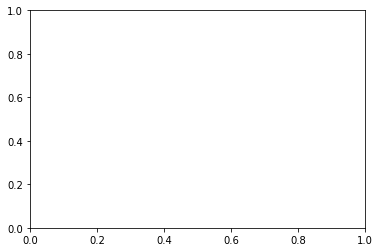

In [57]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

# data coordinates and values
x = dfplottable['lon']
y = dfplottable['lat']
z = dfplottable['depth']

# target grid to interpolate to
# xi = np.arange(-70.8,-67.8,0.05)
xi = np.arange(-76,-72.5,5)
yi = np.arange(35,41.5,5)
# xi = yi = np.arange(60,100,5)
xi,yi = np.meshgrid(xi,yi)

# set mask
# mask = polygon_v

# interpolate
zi = griddata((x,y),z,(xi,yi),method='linear')

# mask out the field
# zi[mask] = np.nan

# plot
fig = plt.figure()
ax = fig.add_subplot(111)
plt.contourf(xi,yi,zi,np.arange(0,180,1))
# plt.contourf(xi,yi,zi,np.arange(0,100,5))
# plt.plot(x,y,'k.')
plt.xlabel('xi',fontsize=16)
plt.ylabel('yi',fontsize=16)
plt.show()

In [79]:
import numpy as np
from matplotlib.path import Path

xi,yi = np.meshgrid(xi,yi)  # X, Y are 2D ndarrays
XY = np.dstack((xi, yi))
XY_flat = XY.reshape((-1, 2))

mpath = Path( df_v_plot.values ) # the vertices of the polygon
mask_flat = mpath.contains_points(XY_flat)
mask = mask_flat.reshape(xi.shape)  

In [102]:
import numpy as np
from matplotlib.path import Path

xi,yi = xi.flatten(), yi.flatten()
# print(xi,yi)

for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if polygon_v.contains(point) == True:
            a = month_df['gear'].iloc[ii]
# points = np.vstack((x,y)).T

# path = Path(df_v_plot.values)
# grid = path.contains_points(points)

# print(grid)
# grid = points_inside_poly(points, polygon_verts)
# grid = grid.reshape((ny,nx))

[-76.   -75.95 -75.9  ... -72.65 -72.6  -72.55] [35.   35.   35.   ... 41.45 41.45 41.45]


In [119]:
# if polygon_v.contains(points) == True:
#     print('yes')

AttributeError: 'numpy.ndarray' object has no attribute '_geom'

In [51]:
points = np.vstack((xi.ravel(), yi.ravel())).T
pointin = np.vstack((x.ravel(), y.ravel())).T

# if polygon_v.contains(points) == True:
#     print('yes')

In [56]:
print(points[200])

[-73.   35.1]


In [53]:
for i in range(len(points)):
    a = points[i]
#     print(a)
    b = Point(points[i])
#     print(b)
    
    if polygon_v.contains(b) == True:
        print('yes')


In [118]:
print(len(pointin))

1248


In [112]:
if points
print(len(points))

82810000


In [ ]:
print(points.tolist())

In [93]:
df_v_plot.values

array([[-76.  ,  37.  ],
       [-75.5 ,  36.  ],
       [-75.  ,  35.5 ],
       [-74.75,  36.  ],
       [-74.5 ,  37.4 ],
       [-72.  ,  39.5 ],
       [-74.  ,  40.5 ],
       [-74.25,  39.4 ],
       [-76.  ,  37.  ]])

In [99]:
import numpy as np
import matplotlib as mpl
from matplotlib.path import Path
from matplotlib import patches
import matplotlib.pyplot as plt

sar_ver = df_v_plot.values

# matplotlib path
path = Path(sar_ver)
xmin, ymin, xmax, ymax = np.asarray(path.get_extents(), dtype=int).ravel()

# create a mesh grid of the shape of the final mask
xi,yi = np.meshgrid(xi,yi)

# mesh grid to points
points = np.vstack((x.ravel(), y.ravel())).T

# mask for the point included in the path
mask = path.contains_points(points)
mask = mask.reshape(x.shape).T

# # plots
# fig = plt.figure(figsize=(8,6))
# gs = mpl.gridspec.GridSpec(2,2)
# gs.update(wspace=0.2, hspace= 0.2)

# # image + patch
# ax = plt.subplot(gs[0])
# ax.imshow(img)
# patch = patches.PathPatch(path, facecolor="None", edgecolor="cyan", lw=3)
# ax.add_patch(patch)

# # mask
# ax = plt.subplot(gs[1])
# ax.imshow(mask)

# # filter image with mask
# ax = plt.subplot(gs[2])
# ax.imshow(img * mask[..., np.newaxis])

# # remove mask from image
# ax = plt.subplot(gs[3])
# ax.imshow(img * ~mask[..., np.newaxis])

# plt.show()

MemoryError: Unable to allocate 48.7 PiB for an array with shape (82810000, 82810000) and data type float64

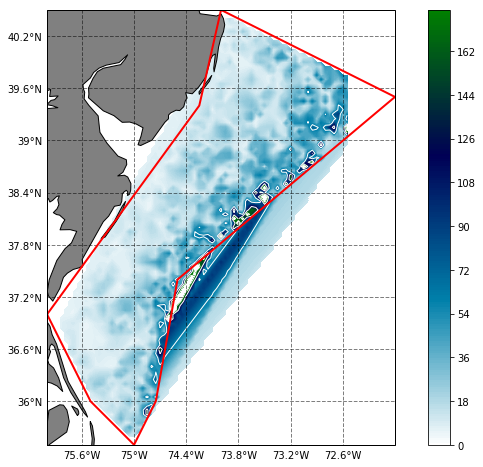

In [152]:
from matplotlib.pyplot import * ; import cartopy.feature as cfeature

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent([-78, -65, 35, 44.75], ccrs.PlateCarree())
ax.set_extent([-76, -72, 35.5, 40.5], ccrs.PlateCarree())
feature = cfeature.NaturalEarthFeature(name='coastline', category='physical',scale='50m',edgecolor='black', facecolor='grey')

ax.add_feature(feature)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
plt.contourf(xi,yi,zi,np.arange(0,180,1))
cf = plt.contourf(xi,yi,zi,np.arange(0,180,1),cmap = 'ocean_r')
plt.contour(xi, yi, zi, levels=5, linewidths=1,colors='white')
cbar = plt.colorbar(cf, ax=ax)

plot(x_v,y_v,color='red', linewidth = 2, linestyle='-') #Western GoM
# plt.scatter(dfplottable['lon']*-1,dfplottable['lat'],c=dfplottable['depth'],cmap='RdBu')
plt.savefig('SPRING_linearinterpol_sMAB_depth')
plt.show()

In [49]:
print(polygon_v)

POLYGON ((76 37, 75.5 36, 75 35.5, 74.75 36, 74.5 37.4, 72 39.5, 74 40.5, 74.25 39.4, 76 37))


### SPRING

In [83]:
new = np.array([15.0, 9.0, 19.0, 8.0, 19.0, 21.0, 23.0, 36.0, 11.0, 77.0, 12.0, 9.0, 318.0, 38.0, 39.0, 19.0, 7.0, 31.0, 32.0, 120.0, 82.0, 50.0, 51.0, 10.0, 40.0, 19.0, 37.0, 20.0, 13.0, 6.0, 13.0, 12.0, 8.0, 8.0, 9.0, 17.0, 19.0, 25.0, 21.0, 10.0, 58.0, 50.0, 58.0, 19.0, 11.0, 349.0, 36.0, 39.0, 50.0, 47.0, 33.0, 29.0, 43.0, 58.0, 19.0, 258.0, 29.0, 20.0, 22.0, 16.0, 17.0, 22.0, 36.0, 9.0, 20.0, 20.0, 22.0, 51.0, 41.0, 47.0, 43.0, 50.0,29.0, 32.0, 44.0, 10.0, 9.0, 6.0, 6.0, 15.0, 11.0, 19.0, 17.0, 15.0, 12.0,12.0, 9.0, 10.0, 6.0, 6.0, 14.0, 6.0, 6.0, 37.0, 6.0, 8.0, 7.0, 7.0, 8.0, 10.0, 9.0, 6.0, 7.0, 9.0, 11.0, 6.0, 8.0, 10.0, 7.0, 8.0, 7.0, 16.0, 8.0, 23.0, 75.0, 210.0, 172.0, 14.0])
np.std(new)

53.32595587201312

In [84]:
stddepth_1978 =49.365225085378796
stddepth_1979 =19.99820928622479
stddepth_1980 =33.15558637265889
stddepth_1981 =22.223917229582824
stddepth_1982 =14.529889017409012
stddepth_1983 =3.8196653976493806
stddepth_1984 =17.51446574739483
stddepth_1985 =15.103512266494072
stddepth_1986 =17.773749543624895
stddepth_1987 =10.608608757844209
stddepth_1988 =1.7511900715418263
stddepth_1991 =48.002891397050384
stddepth_1992 =17.03737876219535
stddepth_1993 =37.59937748140605
stddepth_1994 =21.884978991455927
stddepth_1995 =36.95656118967221
stddepth_1996 =15.760595079137104
stddepth_1997 =37.958593922031966
stddepth_1998 =23.186092110545673
stddepth_1999 =36.99793154725693
stddepth_2000 =34.2683833695935
stddepth_2001 =40.799698974515444
stddepth_2002 =41.1006534902136
stddepth_2003 =40.13557998303673
stddepth_2004 =44.38160479955617
stddepth_2005 =36.419955218374845
stddepth_2006 =32.25389190981371
stddepth_2007 =48.5876294887292
stddepth_2008 =49.168826899719804
stddepth_2009 =48.74189930490712
stddepth_2010 =31.34493396215042
stddepth_2011 =34.68143777585171
stddepth_2012 =69.41434662629938
stddepth_2013 =33.164286514261086
stddepth_2014 =80.26887775470641
stddepth_2015 =17.468052685159318
stddepth_2016 =39.87226930701141
stddepth_2017 =33.22890162572055
stddepth_2018 =53.32595587201312
stddepth_2019 =53.10163225959793

In [85]:
# Spring 1977 to 2020 MLD. Polygon_v is Southern MAB
# depth_1977 = statistics.mean([])
depth_1978 = statistics.mean([17.023809523809526,18.142857142857142])
depth_1979 = statistics.mean([21.28,10.585365853658537])

depth_1980 = statistics.mean([39.9,13.326923076923077,6.115384615384615])
depth_1981 = statistics.mean([28.691358024691358,10.666666666666666])
depth_1982 = statistics.mean([19.068181818181817,5.0])
depth_1983 = statistics.mean([7.3125])
depth_1984 = statistics.mean([10.6875])
depth_1985 = statistics.mean([15.857142857142858,13.254901960784315])
depth_1986 = statistics.mean([16.22222222222222])
depth_1987 = statistics.mean([12.127450980392156])
depth_1988 = statistics.mean([7.0])
# depth_1989 = statistics.mean([])

# depth_1990 = statistics.mean([])
depth_1991 = statistics.mean([28.58823529411765])
depth_1992 = statistics.mean([28.49206349206349,26.0])
depth_1993 = statistics.mean([29.31081081081081,36.8])
depth_1994 = statistics.mean([28.885057471264368])
depth_1995 = statistics.mean([37.214285714285715])
depth_1996 = statistics.mean([23.617977528089888,36.06666666666667])
depth_1997 = statistics.mean([25.78787878787879,8.444444444444445])
depth_1998 = statistics.mean([34.62921348314607,7.769230769230769])
depth_1999 = statistics.mean([29.714285714285715])

depth_2000 = statistics.mean([29.876712328767123,18.823529411764707])
depth_2001 = statistics.mean([33.66216216216216,15.742857142857142])
depth_2002 = statistics.mean([38.75555555555555,13.642857142857142])
depth_2003 = statistics.mean([31.970149253731343])
depth_2004 = statistics.mean([34.79012345679013,8.1])
depth_2005 = statistics.mean([31.725490196078432,21.612903225806452])
depth_2006 = statistics.mean([24.146341463414632,21.0])
depth_2007 = statistics.mean([43.54782608695652,59.44444444444444])
depth_2008 = statistics.mean([34.235955056179776])
depth_2009 = statistics.mean([38.947916666666664,9.044444444444444])

depth_2010 = statistics.mean([32.32258064516129,10.712121212121213])
depth_2011 = statistics.mean([37.95061728395062,11.555555555555555])
depth_2012 = statistics.mean([50.605633802816904])
depth_2013 = statistics.mean([30.49])
depth_2014 = statistics.mean([58.58904109589041,55.26923076923077])
depth_2015 = statistics.mean([25.858695652173914,10.216216216216216])
depth_2016 = statistics.mean([40.68539325842696,21.296296296296298])
depth_2017 = statistics.mean([35.3974358974359,50.4375,13.785714285714286])
depth_2018 = statistics.mean([25.67142857142857,40.90909090909091,18.181818181818183])
depth_2019 = statistics.mean([34.93617021276596,27.56])

In [86]:
def best_fit(X, Y):
    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)
    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2
    b = numer / denum
    a = ybar - b * xbar
    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))
    return a, b

best fit line:
y = -1030.91 + 0.53x


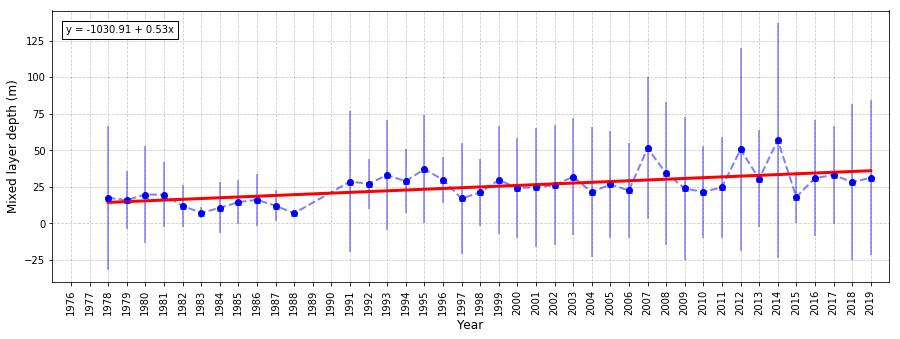

In [89]:
from matplotlib.offsetbox import AnchoredText

x = [1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 
     1988, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 
     1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 
     2011, 2012,2013,2014,2015,2016,2017,2018,2019]
y = [depth_1978,depth_1979,depth_1980,depth_1981,depth_1982,depth_1983,depth_1984,depth_1985,depth_1986,depth_1987,
    depth_1988,depth_1991,depth_1992,depth_1993,depth_1994,depth_1995,depth_1996,depth_1997,depth_1998,depth_1999,
    depth_2000,depth_2001,depth_2002,depth_2003,depth_2004, depth_2005,depth_2006,depth_2007,depth_2008,depth_2009,depth_2010,
    depth_2011,depth_2012,depth_2013,depth_2014,depth_2015,depth_2016,depth_2017,depth_2018,depth_2019]
e = [stddepth_1978,stddepth_1979,stddepth_1980,stddepth_1981,stddepth_1982,stddepth_1983,stddepth_1984,stddepth_1985,stddepth_1986,stddepth_1987,
    stddepth_1988,stddepth_1991,stddepth_1992,stddepth_1993,stddepth_1994,stddepth_1995,stddepth_1996,stddepth_1997,stddepth_1998,stddepth_1999,
    stddepth_2000,stddepth_2001,stddepth_2002,stddepth_2003,stddepth_2004, stddepth_2005,stddepth_2006,stddepth_2007,stddepth_2008,stddepth_2009,stddepth_2010,
    stddepth_2011,stddepth_2012,stddepth_2013,stddepth_2014,stddepth_2015,stddepth_2016,stddepth_2017,stddepth_2018,stddepth_2019]

plt.figure(figsize=(15, 5))
plt.xlim((1975,2020))
# plt.ylim((0,60))
plt.scatter(x, y, marker='o', c='blue')
plt.plot(x,y,linewidth = 2.0, linestyle = '--', c='blue', alpha = 0.5)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Mixed layer depth (m)', fontsize = 12)
a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
plt.plot(x, yfit)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),c='red',linewidth = 3)
plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1976,1977,1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 
     1988, 1989,1990,1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 
     1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 
     2011, 2012,2013,2014,2015,2016,2017,2018,2019], rotation='vertical')
# plt.yticks([0,5,10,15,20,25,30,35,40,45,50,55,60])
plt.errorbar(x, y, e, linestyle='None', marker='^',color='blue',alpha= 0.5)
a = AnchoredText("y = -1030.91 + 0.53x".format(3), loc=2, pad=0.4, borderpad=1)
plt.gca().add_artist(a)
plt.savefig('timeseries_springMLD_SouthernMAB')
plt.show()

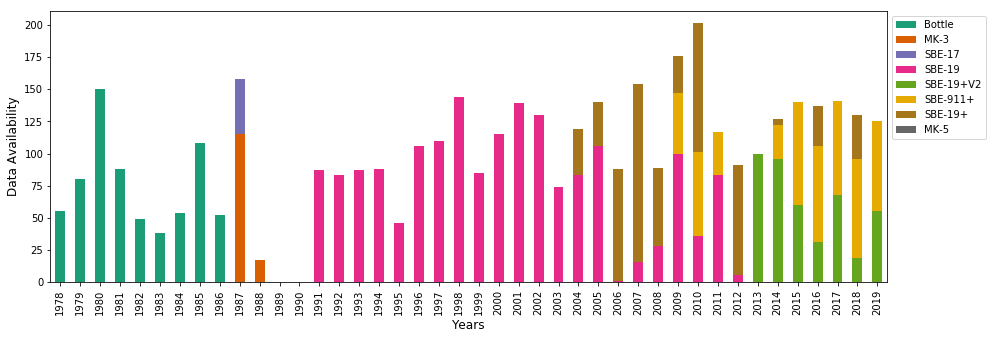

In [99]:
ax.set_xlim(1975, 2020)
ax = df.plot(kind="bar", stacked=True, cmap = 'Dark2') #tab10
plt.gcf().set_size_inches(15, 5)
# plt.title('Data Collection Methods', fontsize = 20)
plt.xlabel('Years',fontsize=12); plt.ylabel('Data Availability',fontsize=12)
ax.legend(bbox_to_anchor=(1, 1))
plt.savefig('datacollection_count_SpringSMAB')
plt.show()

In [192]:
for year in range(1977,2020):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; p_intermediate = []; t_intermediate = []; yd_intermediate = []
    seasonyeardepth = []; seasonyeartemp = []

    for i in range(len(npfile)):
#     for i in range(0,len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        floordepth = npfile[i]['depth']
#         if yd > 334 and yd <= 365 or yd >= 0 and yd <= 59:
        if yd > 151 and yd <= 243:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if polygon_v.contains(point) == True:
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'lat': month_df['t'].iloc[ii]}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            l=[i for i in df_final[0] if i<=6]
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for ii in range(len(l)):
                    val = df_final[1][ii]
                    numrange.append(ii)
                    surfaceval.append(val)
            surfacevalmean = statistics.mean(surfaceval)
            tempfin = []
            pressurefin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
            d = {'temp': list(reversed(tempfin)), 'pressure': list(reversed(pressurefin))}
            dffin = pd.DataFrame(d)
            pnew = []; allmixedcount = []
            inconclusivecount = []
            for i in range(len(dffin)):
                b = dffin.at[i,'temp']
                if b <= (surfacevalmean + 0.2) and b >= (surfacevalmean - 0.2):
                    if dffin.at[i,'pressure'] >= floordepth - 6:
                        seasonyeartemp.append(dffin.at[i,'temp'])
                        seasonyeardepth.append(dffin.at[i,'pressure'])
                    else:
                        pnew.append(dffin.at[i,'pressure'])
                        seasonyeartemp.append(dffin.at[i,'temp'])
                        seasonyeardepth.append(dffin.at[i,'pressure'])
                        np.array(seasonyeartemp)
                        np.array(seasonyeardepth)
                    break  
    monthly = []
    if len(seasonyeartemp) > 0:
#         print(seasonyeardepth)
        print('stddepth_',year,np.std(seasonyeardepth))

stddepth_ 1977 5.274631829926566
stddepth_ 1978 2.2784141930990196
stddepth_ 1979 5.466251850861992
stddepth_ 1980 3.5340905362437094
stddepth_ 1981 3.0254567957301868
stddepth_ 1982 4.768967975941498
stddepth_ 1983 10.686440005914037
stddepth_ 1985 3.815174380753199
stddepth_ 1986 4.42831540478578
stddepth_ 1987 3.5493478024117624
stddepth_ 1989 3.8609152628187355
stddepth_ 1991 3.310704003503022
stddepth_ 1992 2.424177171409482
stddepth_ 1993 2.3779270093936398
stddepth_ 1994 2.617977703798253
stddepth_ 1995 3.1874754901018454
stddepth_ 1996 2.3603681637576637
stddepth_ 1997 2.848399319759653
stddepth_ 1998 2.1280545164478246
stddepth_ 1999 3.132215526736671
stddepth_ 2000 2.976918006315681
stddepth_ 2001 1.8076468443091862
stddepth_ 2002 4.268392156027037
stddepth_ 2003 1.6354070481130232
stddepth_ 2004 2.7732770794922725
stddepth_ 2005 1.212878551284212
stddepth_ 2006 3.6405730717579794
stddepth_ 2007 3.2203915069721476
stddepth_ 2008 4.792846315910922
stddepth_ 2009 2.611393306263

### WINTER

In [194]:
depth_1978= 21.5
depth_1979= 15.724137931034482
depth_1980= 48.25
depth_1982= 38.432432432432435
depth_1984= 26.163265306122447
depth_1985= 35.829787234042556
depth_1986= 35.82692307692308
depth_1987= 27.566037735849058
depth_1988= 30.96078431372549
depth_1990= 27.833333333333332
depth_1992= 39.58695652173913
depth_1993= 40.23529411764706
depth_1994= 34.725806451612904
depth_1995= 34.75
depth_1996= 32.65217391304348
depth_1997= 28.275862068965516
depth_1998= 36.37931034482759
depth_1999= 30.630769230769232
depth_2000= 54.18666666666667
depth_2001 =49.689320388349515
depth_2002 =36.89320388349515
depth_2003 =58.84285714285714
depth_2004 =69.09333333333333
depth_2005 =47.80882352941177
depth_2006 =41.88
depth_2007 =47.85981308411215
depth_2008 =38.04545454545455
depth_2009 =44.70175438596491
depth_2010 =40.42857142857143
depth_2011 =60.5
depth_2012 =55.65079365079365
depth_2013 =34.8125
depth_2017 =43.12903225806452

In [195]:
stddepth_1978 =16.247153596861207
stddepth_1979 =10.109389802944172
stddepth_1980 =14.804982269492928
stddepth_1982 =27.55489904991198
stddepth_1984 =30.642338949181926
stddepth_1985 =41.11029231223349
stddepth_1986 =29.8507319545912
stddepth_1987 =33.8473317328344
stddepth_1988 =35.748007367647794
stddepth_1990 =8.668269082630562
stddepth_1992 =31.134055230327228
stddepth_1993 =23.646363759173248
stddepth_1994 =25.745760286632294
stddepth_1995 =21.49522372196072
stddepth_1996 =18.75843855477402
stddepth_1997 =10.691267953976912
stddepth_1998 =20.302732605452736
stddepth_1999 =19.80720089009529
stddepth_2000 =46.878479307910816
stddepth_2001 =58.970624434035535
stddepth_2002 =35.839424140809506
stddepth_2003 =54.526438073466636
stddepth_2004 =66.67596735122949
stddepth_2005 =65.68491127499641
stddepth_2006 =61.106892137194045
stddepth_2007 =32.65665296907557
stddepth_2008 =16.775190752816744
stddepth_2009 =53.13767781847147
stddepth_2010 =64.02051116900064
stddepth_2011 =77.07863949672871
stddepth_2012 =58.280427363359586
stddepth_2013 =30.349118774960612
stddepth_2017 =26.13456731497376

best fit line:
y = -1184.91 + 0.61x


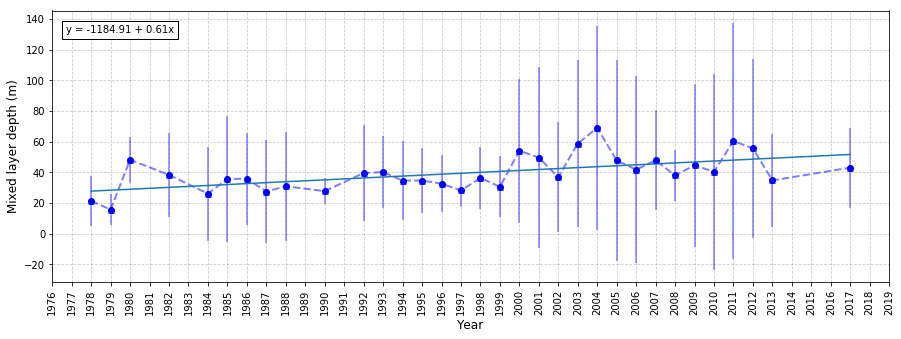

In [198]:
x = [1978,1979,1980,1982,1984,1985,1986,1987,1988,1990,1992,1993,1994,1995,1996,1997,
    1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2017]
y = [depth_1978, depth_1979, depth_1980,depth_1982, depth_1984,depth_1985,depth_1986,
    depth_1987, depth_1988, depth_1990, depth_1992, depth_1993, depth_1994, depth_1995,
    depth_1996, depth_1997, depth_1998, depth_1999, depth_2000, depth_2001, depth_2002,
    depth_2003, depth_2004, depth_2005, depth_2006, depth_2007, depth_2008, depth_2009,
    depth_2010, depth_2011, depth_2012, depth_2013, depth_2017]
e = [stddepth_1978, stddepth_1979, stddepth_1980,stddepth_1982, stddepth_1984,stddepth_1985,stddepth_1986,
    stddepth_1987,stddepth_1988,stddepth_1990,stddepth_1992,stddepth_1993,stddepth_1994,stddepth_1995,
    stddepth_1996, stddepth_1997,stddepth_1998,stddepth_1999,stddepth_2000,stddepth_2001,stddepth_2002,
    stddepth_2003,stddepth_2004,stddepth_2005,stddepth_2006,stddepth_2007,stddepth_2008,stddepth_2009,
    stddepth_2010,stddepth_2011,stddepth_2012,stddepth_2013,stddepth_2017]

plt.figure(figsize=(15, 5))
plt.scatter(x, y, marker='o', c='blue')
plt.plot(x,y,linewidth = 2.0, linestyle = '--', c='blue', alpha = 0.5)
# plt.title('Winter (DJF) Mixed Layer Depth in Southern MAB', fontsize = 15)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Mixed layer depth (m)', fontsize = 12)
a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
plt.plot(x, yfit)
plt.errorbar(x, y, e, linestyle='None', marker='^',color='blue',alpha= 0.5)
# plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),c='red',linewidth = 3)
plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1976,1977,1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 
     1988, 1989,1990,1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 
     1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 
     2011, 2012,2013,2014,2015,2016,2017,2018,2019], rotation='vertical')
# plt.savefig('timeseries_fallMLD_SouthernMAB')
a = AnchoredText("y = -1184.91 + 0.61x".format(3), loc=2, pad=0.4, borderpad=1)
plt.gca().add_artist(a)
plt.savefig('timeseries_winterMLD_SouthernMAB')
plt.show()

### SUMMER

In [207]:
depth_1977 =3.877551020408163
depth_1978 =5.452830188679245
depth_1979 =6.79047619047619
depth_1980 =7.285714285714286
depth_1981 =6.137931034482759
depth_1982 =7.583333333333333
depth_1983 =12.0
depth_1985 =9.666666666666666
depth_1986 =11.904761904761905
depth_1987 =9.646153846153846
depth_1989 =9.733333333333333
depth_1991 =8.931034482758621
depth_1992 =8.948275862068966
depth_1993 =9.673913043478262
depth_1994 =9.109756097560975
depth_1995 =9.0
depth_1996 =8.276190476190477
depth_1997 =9.619047619047619
depth_1998 =8.290322580645162
depth_1999 =9.617021276595745
depth_2000 =9.628571428571428
depth_2001 =7.589743589743589
depth_2002 =11.107692307692307
depth_2003 =7.3076923076923075
depth_2004 =9.18095238095238
depth_2005 =6.7272727272727275
depth_2006 =9.407407407407407
depth_2007 =9.855670103092784
depth_2008 =8.894736842105264
depth_2009 =8.925
depth_2011 =9.543859649122806
depth_2012 =9.507692307692308
depth_2013 =9.030927835051546
depth_2014 =6.5
depth_2015 =8.705882352941176
depth_2016 =8.744186046511627
depth_2017 =7.666666666666667
depth_2018 =7.318181818181818
depth_2019 =9.222222222222221

In [208]:
stddepth_1977 =5.274631829926566
stddepth_1978 =2.2784141930990196
stddepth_1979 =5.466251850861992
stddepth_1980 =3.5340905362437094
stddepth_1981 =3.0254567957301868
stddepth_1982 =4.768967975941498
stddepth_1983 =10.686440005914037
stddepth_1985 =3.815174380753199
stddepth_1986 =4.42831540478578
stddepth_1987 =3.5493478024117624
stddepth_1989 =3.8609152628187355
stddepth_1991 =3.310704003503022
stddepth_1992 =2.424177171409482
stddepth_1993 =2.3779270093936398
stddepth_1994 =2.617977703798253
stddepth_1995 =3.1874754901018454
stddepth_1996 =2.3603681637576637
stddepth_1997 =2.848399319759653
stddepth_1998 =2.1280545164478246
stddepth_1999 =3.132215526736671
stddepth_2000 =2.976918006315681
stddepth_2001 =1.8076468443091862
stddepth_2002 =4.268392156027037
stddepth_2003 =1.6354070481130232
stddepth_2004 =2.7732770794922725
stddepth_2005 =1.212878551284212
stddepth_2006 =3.6405730717579794
stddepth_2007 =3.2203915069721476
stddepth_2008 =4.792846315910922
stddepth_2009 =2.6113933062639183
stddepth_2011 =5.261812693588293
stddepth_2012 =3.8275241120602184
stddepth_2013 =2.8518527464747763
stddepth_2014 =0.5
stddepth_2015 =3.981792470769517
stddepth_2016 =2.273129420146493
stddepth_2017 =1.247219128924647
stddepth_2018 =1.4889399412871998
stddepth_2019 =4.589305872902974

best fit line:
y = -33.37 + 0.02x


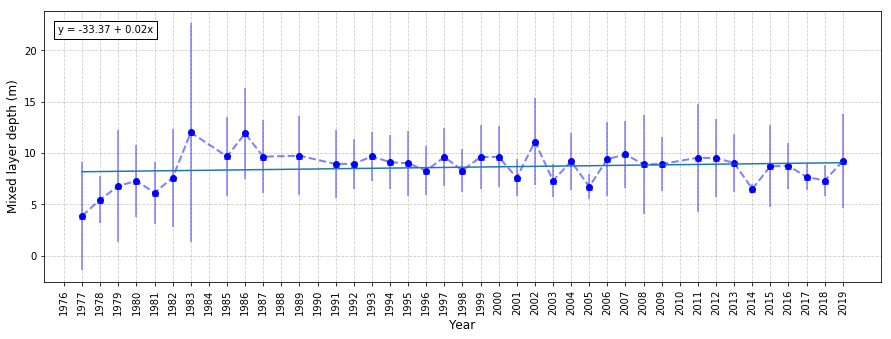

In [210]:
x = [1977,1978,1979,1980,1981,1982,1983,1985,1986,1987,1989,1991,1992,1993,
    1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,
    2011,2012,2013,2014,2015,2016,2017,2018,2019]
y = [depth_1977,depth_1978,depth_1979,depth_1980,depth_1981,depth_1982,
    depth_1983,depth_1985,depth_1986,depth_1987,depth_1989,depth_1991,
    depth_1992,depth_1993,depth_1994,depth_1995,depth_1996,depth_1997,
    depth_1998,depth_1999,depth_2000,depth_2001,depth_2002,depth_2003,
    depth_2004,depth_2005,depth_2006,depth_2007,depth_2008,depth_2009,
    depth_2011,depth_2012,depth_2013,depth_2014,depth_2015,depth_2016,
    depth_2017,depth_2018,depth_2019]
e = [stddepth_1977,stddepth_1978,stddepth_1979,stddepth_1980,stddepth_1981,stddepth_1982,
    stddepth_1983,stddepth_1985,stddepth_1986,stddepth_1987,stddepth_1989,stddepth_1991,
    stddepth_1992,stddepth_1993,stddepth_1994,stddepth_1995,stddepth_1996,stddepth_1997,
    stddepth_1998,stddepth_1999,stddepth_2000,stddepth_2001,stddepth_2002,stddepth_2003,
    stddepth_2004,stddepth_2005,stddepth_2006,stddepth_2007,stddepth_2008,stddepth_2009,
    stddepth_2011,stddepth_2012,stddepth_2013,stddepth_2014,stddepth_2015,stddepth_2016,
    stddepth_2017,stddepth_2018,stddepth_2019]

plt.figure(figsize=(15, 5))
plt.scatter(x, y, marker='o', c='blue')
plt.plot(x,y,linewidth = 2.0, linestyle = '--', c='blue', alpha = 0.5)
# plt.title('Winter (DJF) Mixed Layer Depth in Southern MAB', fontsize = 15)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Mixed layer depth (m)', fontsize = 12)
a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
plt.plot(x, yfit)
plt.errorbar(x, y, e, linestyle='None', marker='^',color='blue',alpha= 0.5)
# plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),c='red',linewidth = 3)
plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1976,1977,1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 
     1988, 1989,1990,1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 
     1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 
     2011, 2012,2013,2014,2015,2016,2017,2018,2019], rotation='vertical')
# plt.savefig('timeseries_fallMLD_SouthernMAB')
a = AnchoredText("y = -33.37 + 0.02x".format(3), loc=2, pad=0.4, borderpad=1)
plt.gca().add_artist(a)
plt.savefig('timeseries_summerMLD_SouthernMAB')
plt.show()

### FALL

In [203]:
depth_1977 =22.46511627906977
depth_1978 =25.133333333333333
depth_1979 =16.75925925925926
depth_1980 =20.73469387755102
depth_1983 =33.24528301886792
depth_1984 =24.41176470588235
depth_1985 =18.22826086956522
depth_1986 =20.337349397590362
depth_1987 =32.214285714285715
depth_1988 =20.642857142857142
depth_1991 =12.921052631578947
depth_1992 =14.478260869565217
depth_1993 =11.686567164179104
depth_1994 =14.76923076923077
depth_1995 =17.84375
depth_1996 =12.8125
depth_1997 =13.5375
depth_1998 =18.23076923076923
depth_1999 =23.333333333333332
depth_2000 =21.387096774193548
depth_2001 =18.94736842105263
depth_2002 =22.008333333333333
depth_2003 =16.228915662650603
depth_2004 =17.69298245614035
depth_2005 =20.522058823529413
depth_2006 =20.91919191919192
depth_2007 =18.075
depth_2008 =18.827272727272728
depth_2009 =26.303030303030305
depth_2010 =21.746153846153845
depth_2011 =23.824074074074073
depth_2012 =20.885714285714286
depth_2013 =17.925619834710744
depth_2014 =24.589041095890412
depth_2015 =16.94871794871795
depth_2016 =14.875
depth_2017 =25.545454545454547
depth_2018 =18.009090909090908
depth_2019 =20.944

In [200]:
a = np.array([8.0, 6.0, 20.0, 13.0, 11.0, 13.0, 13.0, 9.0, 11.0, 10.0, 11.0, 12.0, 15.0, 12.0, 19.0, 11.0, 9.0, 7.0, 5.0, 4.0, 7.0, 18.0, 9.0, 10.0, 15.0, 8.0, 13.0, 8.0, 13.0, 18.0, 9.0, 12.0, 17.0, 12.0, 8.0, 9.0, 19.0, 16.0, 15.0, 13.0, 16.0, 27.0, 30.0, 23.0, 16.0, 7.0, 22.0, 9.0, 13.0, 18.0, 17.0, 25.0, 20.0, 19.0, 18.0, 18.0, 7.0, 18.0, 10.0, 21.0, 9.0, 18.0, 17.0, 19.0, 7.0, 7.0, 9.0, 9.0, 9.0, 19.0, 15.0, 22.0, 15.0, 7.0, 7.0, 6.0, 22.0, 50.0, 19.0, 43.0, 57.0, 87.0, 43.0, 12.0, 47.0, 11.0, 9.0, 36.0, 26.0, 63.0, 12.0, 13.0, 13.0, 35.0, 21.0, 27.0, 12.0, 34.0, 14.0, 69.0, 16.0, 6.0, 15.0, 18.0, 10.0, 8.0, 5.0, 14.0, 10.0, 22.0, 17.0, 29.0, 29.0, 26.0])
print(np.std(a))
print(np.mean(a))

13.311469261955002
17.69298245614035


In [204]:
stddepth_1977 =15.478941189090303
stddepth_1978 =24.01906650050238
stddepth_1979 =9.051161548510173
stddepth_1980 =12.61886425596102
stddepth_1983 =25.47429756128037
stddepth_1984 =13.795674898511527
stddepth_1985 =15.29855297282661
stddepth_1986 =13.228553553540356
stddepth_1987 =30.669929211250704
stddepth_1988 =7.4795639947138906
stddepth_1991 =4.698160776457149
stddepth_1992 =6.800700508786425
stddepth_1993 =4.392017709313319
stddepth_1994 =6.942849257944496
stddepth_1995 =8.216254373952891
stddepth_1996 =4.952508833914383
stddepth_1997 =5.800740793209088
stddepth_1998 =9.804398642528637
stddepth_1999 =13.327081867802535
stddepth_2000 =14.752460890440213
stddepth_2001 =11.513411024786246
stddepth_2002 =15.020816574193148
stddepth_2003 =9.232375330644832
stddepth_2004 =13.311469261955002
stddepth_2005 =14.609106201152068
stddepth_2006 =15.390983040175344
stddepth_2007 =8.558779605372097
stddepth_2008 =14.311380780159222
stddepth_2009 =22.246872232981357
stddepth_2010 =17.6788929075853
stddepth_2011 =16.282135577296856
stddepth_2012 =18.33228444742293
stddepth_2013 =9.96619516683314
stddepth_2014 =16.279944478750163
stddepth_2015 =10.254743454304913
stddepth_2016 =8.331228900948528
stddepth_2017 =9.680004098079865
stddepth_2018 =12.733274558876657
stddepth_2019 =13.568377353243092

best fit line:
y = 94.83 + -0.04x


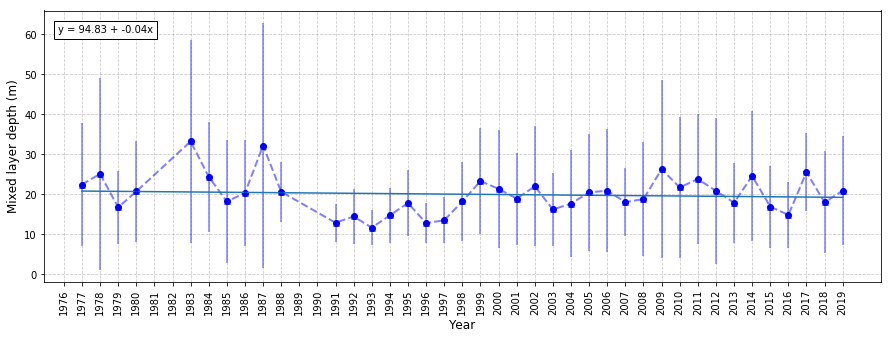

In [205]:
x = [1977,1978,1979,1980,1983,1984,1985,1986,1987,1988,1991,1992,1993,1994,1995,
    1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,
    2011,2012,2013,2014,2015,2016,2017,2018,2019]
y = [depth_1977,depth_1978,depth_1979,depth_1980,depth_1983,depth_1984,depth_1985,depth_1986,
    depth_1987,depth_1988,depth_1991,depth_1992,depth_1993,depth_1994,depth_1995,depth_1996,
    depth_1997,depth_1998,depth_1999,depth_2000,depth_2001,depth_2002,depth_2003,depth_2004,
    depth_2005,depth_2006,depth_2007,depth_2008,depth_2009,depth_2010,depth_2011,depth_2012,
    depth_2013,depth_2014,depth_2015,depth_2016,depth_2017,depth_2018,depth_2019]
e = [stddepth_1977,stddepth_1978,stddepth_1979,stddepth_1980,stddepth_1983,stddepth_1984,stddepth_1985,stddepth_1986,
    stddepth_1987,stddepth_1988,stddepth_1991,stddepth_1992,stddepth_1993,stddepth_1994,stddepth_1995,stddepth_1996,
    stddepth_1997,stddepth_1998,stddepth_1999,stddepth_2000,stddepth_2001,stddepth_2002,stddepth_2003,stddepth_2004,
    stddepth_2005,stddepth_2006,stddepth_2007,stddepth_2008,stddepth_2009,stddepth_2010,stddepth_2011,stddepth_2012,
    stddepth_2013,stddepth_2014,stddepth_2015,stddepth_2016,stddepth_2017,stddepth_2018,stddepth_2019]

plt.figure(figsize=(15, 5))
plt.scatter(x, y, marker='o', c='blue')
plt.plot(x,y,linewidth = 2.0, linestyle = '--', c='blue', alpha = 0.5)
# plt.title('Winter (DJF) Mixed Layer Depth in Southern MAB', fontsize = 15)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Mixed layer depth (m)', fontsize = 12)
a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
plt.plot(x, yfit)
plt.errorbar(x, y, e, linestyle='None', marker='^',color='blue',alpha= 0.5)
# plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),c='red',linewidth = 3)
plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1976,1977,1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 
     1988, 1989,1990,1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 
     1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 
     2011, 2012,2013,2014,2015,2016,2017,2018,2019], rotation='vertical')
# plt.savefig('timeseries_fallMLD_SouthernMAB')
a = AnchoredText("y = 94.83 + -0.04x".format(3), loc=2, pad=0.4, borderpad=1)
plt.gca().add_artist(a)
plt.savefig('timeseries_fallMLD_SouthernMAB')
plt.show()

In [171]:
# Fall 1977 to 2020 MLD. Polygon_v is Southern MAB
# depth_1977 = statistics.mean([])
# depth_1978 = statistics.mean([])
# depth_1979 = statistics.mean([])

depth_1980 = statistics.mean([12.961538461538462])
# depth_1981 = statistics.mean([])
# depth_1982 = statistics.mean([])
# depth_1983 = statistics.mean([])
# depth_1984 = statistics.mean([])
depth_1985 = statistics.mean([8.976190476190476])
depth_1986 = statistics.mean([11.766666666666667])
# depth_1987 = statistics.mean([])
# depth_1988 = statistics.mean([])
# depth_1989 = statistics.mean([])

# depth_1990 = statistics.mean([])
depth_1991 = statistics.mean([12.921052631578947])
depth_1992 = statistics.mean([14.076923076923077])
depth_1993 = statistics.mean([11.686567164179104])
depth_1994 = statistics.mean([14.76923076923077])
depth_1995 = statistics.mean([17.84375])
depth_1996 = statistics.mean([12.8125])
depth_1997 = statistics.mean([13.569620253164556])
depth_1998 = statistics.mean([13.61111111111111])
depth_1999 = statistics.mean([19.397058823529413])

depth_2000 = statistics.mean([14.78688524590164])
depth_2001 = statistics.mean([13.707317073170731])
depth_2002 = statistics.mean([12.666666666666666])
depth_2003 = statistics.mean([11.88888888888889])
depth_2004 = statistics.mean([13.381578947368421])
depth_2005 = statistics.mean([13.727272727272727,29.389830508474578])
depth_2006 = statistics.mean([16.170731707317074,43.8235294117647])
depth_2007 = statistics.mean([16.088607594936708,25.583333333333332,20.379310344827587])
depth_2008 = statistics.mean([12.053333333333333,35.0,33.294117647058826])
depth_2009 = statistics.mean([17.10810810810811,33.1,39.0625])

depth_2010 = statistics.mean([16.51685393258427,25.0,33.51282051282051])
depth_2011 = statistics.mean([20.691176470588236,29.15])
depth_2012 = statistics.mean([14.686868686868687,35.853658536585364])
depth_2013 = statistics.mean([14.88888888888889,31.59090909090909])
depth_2014 = statistics.mean([19.65686274509804,36.02272727272727])
depth_2015 = statistics.mean([13.5,27.413793103448278])
depth_2016 = statistics.mean([14.784810126582279,22.0])
depth_2017 = statistics.mean([25.545454545454547])
depth_2018 = statistics.mean([11.76388888888889,29.842105263157894])
depth_2019 = statistics.mean([16.17241379310345,31.86842105263158])

In [ ]:
plt.figure(figsize=(15, 5))
plt.xlim((1975,2020))
# plt.ylim((0,60))
plt.scatter(x, y, marker='o', c='blue')
plt.plot(x,y,linewidth = 2.0, linestyle = '--', c='blue', alpha = 0.5)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Mixed layer depth (m)', fontsize = 12)
a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
plt.plot(x, yfit)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),c='red',linewidth = 3)
plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1976,1977,1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 
     1988, 1989,1990,1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 
     1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 
     2011, 2012,2013,2014,2015,2016,2017,2018,2019], rotation='vertical')
# plt.yticks([0,5,10,15,20,25,30,35,40,45,50,55,60])
plt.errorbar(x, y, e, linestyle='None', marker='^',color='blue',alpha= 0.5)
a = AnchoredText("y = -1030.91 + 0.53x".format(3), loc=2, pad=0.4, borderpad=1)
plt.gca().add_artist(a)
plt.savefig('timeseries_springMLD_SouthernMAB')
plt.show()

best fit line:
y = -869.24 + 0.44x


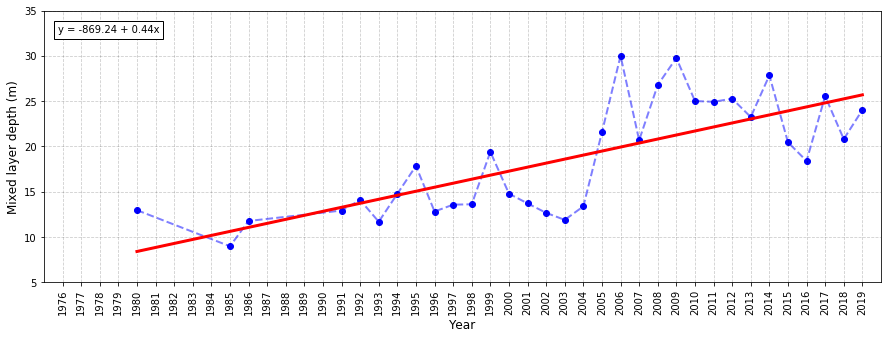

In [109]:
from matplotlib.offsetbox import AnchoredText

x = [1980, 1985, 1986, 
     1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 
     1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 
     2011, 2012,2013,2014,2015,2016,2017,2018,2019]
y = [depth_1980,depth_1985,depth_1986,
    depth_1991,depth_1992,depth_1993,depth_1994,depth_1995,depth_1996,depth_1997,depth_1998,depth_1999,
    depth_2000,depth_2001,depth_2002,depth_2003,depth_2004, depth_2005,depth_2006,depth_2007,depth_2008,depth_2009,depth_2010,
    depth_2011,depth_2012,depth_2013,depth_2014,depth_2015,depth_2016,depth_2017,depth_2018,depth_2019]

plt.figure(figsize=(15, 5))
plt.xlim((1975,2020))
plt.ylim((5,35))
plt.scatter(x, y, marker='o', c='blue')
plt.plot(x,y,linewidth = 2.0, linestyle = '--', c='blue', alpha = 0.5)
# plt.title('Spring (AMJ) Mixed Layer Depth in Southern MAB', fontsize = 15)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Mixed layer depth (m)', fontsize = 12)
a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
plt.plot(x, yfit)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),c='red',linewidth = 3)
plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1976,1977,1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 
     1988, 1989,1990,1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 
     1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 
     2011, 2012,2013,2014,2015,2016,2017,2018,2019], rotation='vertical')
plt.yticks([5,10,15,20,25,30,35])
a = AnchoredText("y = -869.24 + 0.44x".format(3), loc=2, pad=0.4, borderpad=1)
plt.gca().add_artist(a)
plt.savefig('timeseries_fallMLD_SouthernMAB')
plt.show()

In [110]:
filelen = []; years = []
Bottles = []; MK3 = []
SBE17 = []; SBE19 = []
MK5 = []; SBE19V2 = []
SBE911 = []; SBE19plus = []

for year in range(1978,2020):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; yd_intermediate = [];gear_intermediate = []
    Bottles_intermediate = []; MK3_intermediate = []
    SBE17_intermediate = []; SBE19_intermediate = []
    MK5_intermediate = []; SBE19V2_intermediate = []
    SBE911_intermediate = []; SBE19plus_intermediate = []
        
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        gear = npfile[i]['gear']
        if yd > 243 and yd <= 334:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            yd_intermediate.append(npfile[i]['yd'])
            gear_intermediate.append(npfile[i]['gear'])
            
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'gear': gear_intermediate})
#     print(month_df)
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if polygon_v.contains(point) == True:
            a = month_df['gear'].iloc[ii]
#             print(a)
            if a == 'Bottle':
                Bottles_intermediate.append(i)
            if a == 'MK-3':
                MK3_intermediate.append(i)
            if a == 'SBE-17':
                SBE17_intermediate.append(i)
            if a == 'SBE-19':
                SBE19_intermediate.append(i)
            if a == 'MK-5':
                MK5_intermediate.append(i)
            if a == 'SBE-19+V2':
                SBE19V2_intermediate.append(i)
            if a == 'SBE-911+':
                SBE911_intermediate.append(i)
            if a == 'SBE-19+':
                SBE19plus_intermediate.append(i)
    Bottles.append(len(Bottles_intermediate))
    MK3.append(len(MK3_intermediate))
    SBE17.append(len(SBE17_intermediate))
    SBE19.append(len(SBE19_intermediate))
    MK5.append(len(MK5_intermediate))
    SBE19V2.append(len(SBE19V2_intermediate))
    SBE911.append(len(SBE911_intermediate))
    SBE19plus.append(len(SBE19plus_intermediate))

In [113]:
df = pd.DataFrame(index=years, 
                  data={'Bottle': Bottles,'MK-3': MK3, 
                        'SBE-17': SBE17,'SBE-19': SBE19,
                        'SBE-19+V2': SBE19V2,'SBE-911+': SBE911,
                        'SBE-19+': SBE19plus,'MK-5': MK5})

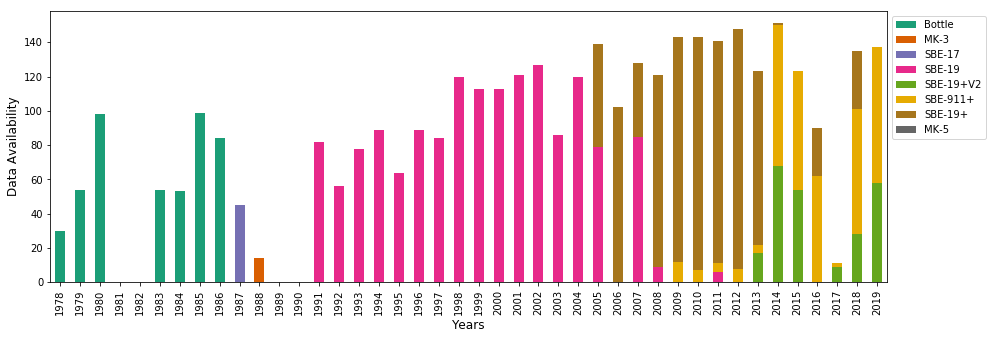

In [115]:
ax.set_xlim(1975, 2020)
ax = df.plot(kind="bar", stacked=True, cmap = 'Dark2') #tab10
plt.gcf().set_size_inches(15, 5)
# plt.title('Data Collection Methods', fontsize = 20)
plt.xlabel('Years',fontsize=12); plt.ylabel('Data Availability',fontsize=12)
ax.legend(bbox_to_anchor=(1, 1))
plt.savefig('datacollection_count_FallSMAB')
plt.show()

In [116]:
# Summer 1977 to 2020 MLD. Polygon_v is Southern MAB
depth_1977 = statistics.mean([3.877551020408163])
depth_1978 = statistics.mean([5.481481481481482,5.423076923076923])
depth_1979 = statistics.mean([4.590909090909091,5.59375,8.490196078431373])

depth_1980 = statistics.mean([7.428571428571429,7.261904761904762])
depth_1981 = statistics.mean([6.137931034482759])
depth_1982 = statistics.mean([7.583333333333333])
depth_1983 = statistics.mean([12.0])
# depth_1984 = statistics.mean([])
depth_1985 = statistics.mean([9.666666666666666])
depth_1986 = statistics.mean([11.904761904761905])
depth_1987 = statistics.mean([9.646153846153846])
# depth_1988 = statistics.mean([])
depth_1989 = statistics.mean([7.84,10.461538461538462])

# depth_1990 = statistics.mean([])
depth_1991 = statistics.mean([10.0,7.0,9.173913043478262])
depth_1992 = statistics.mean([9.0,8.931818181818182])
depth_1993 = statistics.mean([9.673913043478262])
depth_1994 = statistics.mean([9.0,8.5,10.235294117647058])
depth_1995 = statistics.mean([8.428571428571429,12.0])
depth_1996 = statistics.mean([6.0,8.298076923076923])
depth_1997 = statistics.mean([10.666666666666666,9.525925925925925])
depth_1998 = statistics.mean([8.0,8.290322580645162])
depth_1999 = statistics.mean([9.652173913043478])

depth_2000 = statistics.mean([9.628571428571428])
depth_2001 = statistics.mean([6.166666666666667,7.848484848484849])
depth_2002 = statistics.mean([10.6,11.542857142857143])
depth_2003 = statistics.mean([7.0,7.363636363636363])
depth_2004 = statistics.mean([8.333333333333334,10.07843137254902])
depth_2005 = statistics.mean([6.5,7.333333333333333])
depth_2006 = statistics.mean([10.473684210526315,8.029411764705882,10.357142857142858])
depth_2007 = statistics.mean([8.35593220338983,12.18421052631579])
depth_2008 = statistics.mean([7.074074074074074,8.444444444444445,13.666666666666666])
depth_2009 = statistics.mean([8.61111111111111,9.016129032258064])

# depth_2010 = statistics.mean([])
depth_2011 = statistics.mean([10.382352941176471,8.304347826086957])
depth_2012 = statistics.mean([8.733333333333333,10.17142857142857])
depth_2013 = statistics.mean([9.616666666666667,8.26086956521739,7.785714285714286])
depth_2014 = statistics.mean([6.5])
depth_2015 = statistics.mean([8.705882352941176])
depth_2016 = statistics.mean([7.444444444444445,9.088235294117647])
depth_2017 = statistics.mean([7.666666666666667])
depth_2018 = statistics.mean([10.0,7.190476190476191])
depth_2019 = statistics.mean([9.222222222222221])

best fit line:
y = -43.74 + 0.03x


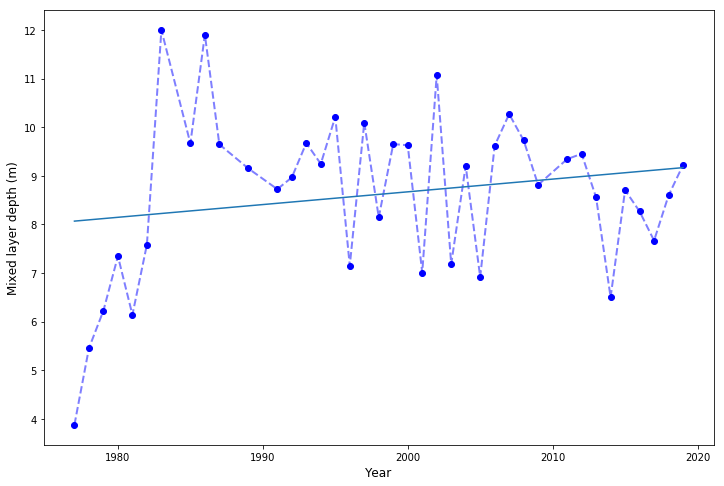

In [117]:
x = [1977, 1978, 1979, 1980, 1981, 1982, 1983, 1985, 1986, 1987, 
     1989, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 
     1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 
     2011, 2012,2013,2014,2015,2016,2017,2018,2019]
y = [depth_1977,depth_1978,depth_1979,depth_1980,depth_1981,depth_1982,depth_1983,depth_1985,depth_1986,depth_1987,
    depth_1989,depth_1991,depth_1992,depth_1993,depth_1994,depth_1995,depth_1996,depth_1997,depth_1998,depth_1999,
    depth_2000,depth_2001,depth_2002,depth_2003,depth_2004, depth_2005,depth_2006,depth_2007,depth_2008,depth_2009,
    depth_2011,depth_2012,depth_2013,depth_2014,depth_2015,depth_2016,depth_2017,depth_2018,depth_2019]

plt.figure(figsize=(12, 8))
plt.scatter(x, y, marker='o', c='blue')
plt.plot(x,y,linewidth = 2.0, linestyle = '--', c='blue', alpha = 0.5)
# plt.title('Summer (JJA) Mixed Layer Depth in Southern MAB', fontsize = 15)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Mixed layer depth (m)', fontsize = 12)
a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
plt.plot(x, yfit)
# plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),c='red',linewidth = 3)
# plt.grid(True)
plt.savefig('timeseries_summerMLD_SouthernMAB')
plt.show()

best fit line:
y = -43.74 + 0.03x


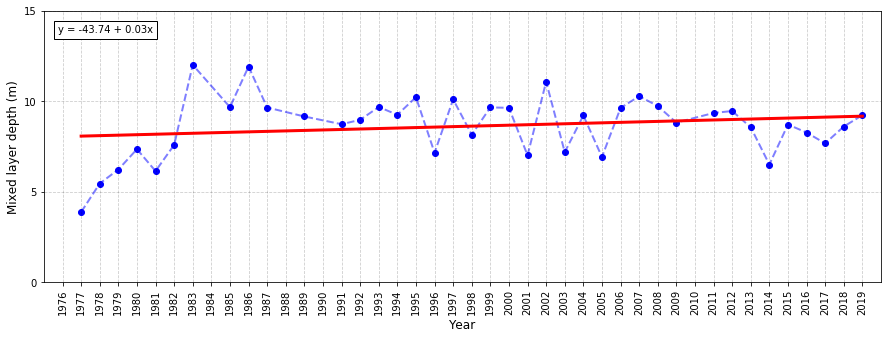

In [122]:
from matplotlib.offsetbox import AnchoredText

x = [1977, 1978, 1979, 1980, 1981, 1982, 1983, 1985, 1986, 1987, 
     1989, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 
     1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 
     2011, 2012,2013,2014,2015,2016,2017,2018,2019]
y = [depth_1977,depth_1978,depth_1979,depth_1980,depth_1981,depth_1982,depth_1983,depth_1985,depth_1986,depth_1987,
    depth_1989,depth_1991,depth_1992,depth_1993,depth_1994,depth_1995,depth_1996,depth_1997,depth_1998,depth_1999,
    depth_2000,depth_2001,depth_2002,depth_2003,depth_2004, depth_2005,depth_2006,depth_2007,depth_2008,depth_2009,
    depth_2011,depth_2012,depth_2013,depth_2014,depth_2015,depth_2016,depth_2017,depth_2018,depth_2019]

plt.figure(figsize=(15, 5))
plt.xlim((1975,2020))
plt.ylim((0,15))
plt.scatter(x, y, marker='o', c='blue')
plt.plot(x,y,linewidth = 2.0, linestyle = '--', c='blue', alpha = 0.5)
# plt.title('Spring (AMJ) Mixed Layer Depth in Southern MAB', fontsize = 15)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Mixed layer depth (m)', fontsize = 12)
a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
plt.plot(x, yfit)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),c='red',linewidth = 3)
plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1976,1977,1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 
     1988, 1989,1990,1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 
     1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 
     2011, 2012,2013,2014,2015,2016,2017,2018,2019], rotation='vertical')
plt.yticks([0,5,10,15])
a = AnchoredText("y = -43.74 + 0.03x".format(3), loc=2, pad=0.4, borderpad=1)
plt.gca().add_artist(a)
plt.savefig('timeseries_summerMLDLD_SouthernMAB')
plt.show()

In [133]:
filelen = []
Bottles = []; MK3 = []
SBE17 = []; SBE19 = []
MK5 = []; SBE19V2 = []
SBE911 = []; SBE19plus = []

for year in range(1977,2020):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; yd_intermediate = [];gear_intermediate = []
    Bottles_intermediate = []; MK3_intermediate = []
    SBE17_intermediate = []; SBE19_intermediate = []
    MK5_intermediate = []; SBE19V2_intermediate = []
    SBE911_intermediate = []; SBE19plus_intermediate = []
        
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        gear = npfile[i]['gear']
        if yd > 151 and yd <= 243:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            yd_intermediate.append(npfile[i]['yd'])
            gear_intermediate.append(npfile[i]['gear'])
            
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'gear': gear_intermediate})
#     print(month_df)
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if polygon_v.contains(point) == True:
            a = month_df['gear'].iloc[ii]
#             print(a)
            if a == 'Bottle':
                Bottles_intermediate.append(i)
            if a == 'MK-3':
                MK3_intermediate.append(i)
            if a == 'SBE-17':
                SBE17_intermediate.append(i)
            if a == 'SBE-19':
                SBE19_intermediate.append(i)
            if a == 'MK-5':
                MK5_intermediate.append(i)
            if a == 'SBE-19+V2':
                SBE19V2_intermediate.append(i)
            if a == 'SBE-911+':
                SBE911_intermediate.append(i)
            if a == 'SBE-19+':
                SBE19plus_intermediate.append(i)
    Bottles.append(len(Bottles_intermediate))
    MK3.append(len(MK3_intermediate))
    SBE17.append(len(SBE17_intermediate))
    SBE19.append(len(SBE19_intermediate))
    MK5.append(len(MK5_intermediate))
    SBE19V2.append(len(SBE19V2_intermediate))
    SBE911.append(len(SBE911_intermediate))
    SBE19plus.append(len(SBE19plus_intermediate))

In [135]:
years = [1977,1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [136]:
df = pd.DataFrame(index=years, 
                  data={'Bottle': Bottles,'MK-3': MK3, 
                        'SBE-17': SBE17,'SBE-19': SBE19,
                        'SBE-19+V2': SBE19V2,'SBE-911+': SBE911,
                        'SBE-19+': SBE19plus,'MK-5': MK5})

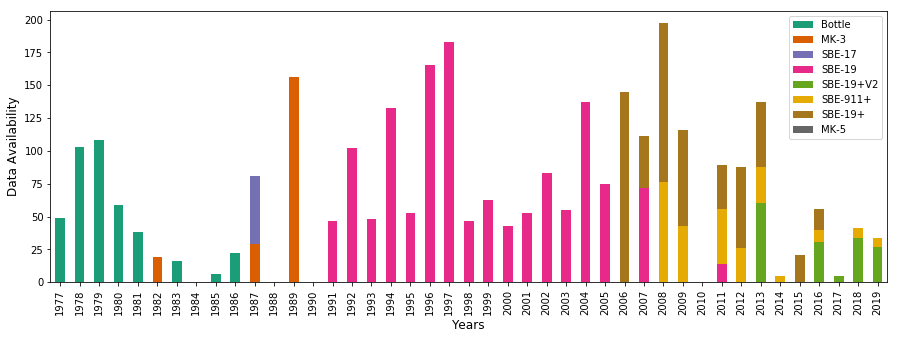

In [137]:
ax.set_xlim(1975, 2020)
ax = df.plot(kind="bar", stacked=True, cmap = 'Dark2') #tab10
plt.gcf().set_size_inches(15, 5)
# plt.title('Data Collection Methods', fontsize = 20)
plt.xlabel('Years',fontsize=12); plt.ylabel('Data Availability',fontsize=12)
ax.legend(bbox_to_anchor=(1, 1))
plt.savefig('datacollection_count_SummerSMAB')
plt.show()

In [174]:
# Winter 1977 to 2020 MLD. Polygon_v is Southern MAB
depth_1977 = statistics.mean([12.565217391304348])
depth_1978 = statistics.mean([15.583941605839415])
depth_1979 = statistics.mean([12.0,20.0])

depth_1980 = statistics.mean([19.77304964539007,49.166666666666664])
depth_1981 = statistics.mean([22.120689655172413])
depth_1982 = statistics.mean([24.86315789473684,38.432432432432435])
depth_1983 = statistics.mean([22.273684210526316,77.8])
depth_1984 = statistics.mean([17.757575757575758])
# depth_1985 = statistics.mean([196.0, 16.10994764397906]) # Real
depth_1985 = statistics.mean([16.10994764397906]) # Take away anomaly
depth_1986 = statistics.mean([35.82692307692308, 17.906040268456376])
depth_1987 = statistics.mean([27.566037735849058, 15.392344497607656])
depth_1988 = statistics.mean([30.96078431372549, 13.586206896551724])
depth_1989 = statistics.mean([9.733333333333333])

depth_1990 = statistics.mean([27.833333333333332])
depth_1991 = statistics.mean([19.321052631578947])
depth_1992 = statistics.mean([18.08139534883721])
depth_1993 = statistics.mean([34.833333333333336, 18.651041666666668])
depth_1994 = statistics.mean([17.86234817813765])
depth_1995 = statistics.mean([22.366412213740457])
depth_1996 = statistics.mean([15.698961937716263])
depth_1997 = statistics.mean([15.301492537313433])
depth_1998 = statistics.mean([22.292])
depth_1999 = statistics.mean([22.87866108786611])

depth_2000 = statistics.mean([22.142201834862384])
depth_2001 = statistics.mean([46.07142857142857, 21.348314606741575])
depth_2002 = statistics.mean([23.871287128712872])
depth_2003 = statistics.mean([20.90340909090909])
depth_2004 = statistics.mean([18.967741935483872])
depth_2005 = statistics.mean([29.625,24.182142857142857])
depth_2006 = statistics.mean([94.25,18.380228136882128])
depth_2007 = statistics.mean([42.5,25.419354838709676])
depth_2008 = statistics.mean([38.04545454545455,19.59105431309904])
depth_2009 = statistics.mean([57.2972972972973,23.60339943342776])

depth_2010 = statistics.mean([24.13422818791946])
depth_2011 = statistics.mean([97.06666666666666,23.82051282051282])
depth_2012 = statistics.mean([83.65217391304348,25.85144927536232])
depth_2013 = statistics.mean([19.163522012578618])
depth_2014 = statistics.mean([39.391941391941394])
depth_2015 = statistics.mean([18.58555133079848])
depth_2016 = statistics.mean([24.10878661087866])
depth_2017 = statistics.mean([31.308823529411764])
depth_2018 = statistics.mean([21.296747967479675])
depth_2019 = statistics.mean([25.790076335877863])

best fit line:
y = -573.02 + 0.30x


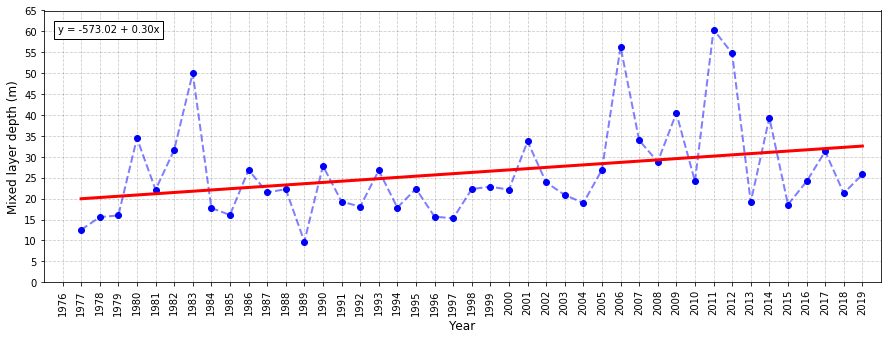

In [152]:
x = [1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 
     1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 
     1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 
     2011, 2012,2013,2014,2015,2016,2017,2018,2019]
y = [depth_1977,depth_1978,depth_1979,depth_1980,depth_1981,depth_1982,depth_1983,depth_1984,depth_1985,depth_1986,depth_1987,
    depth_1988,depth_1989,depth_1990,depth_1991,depth_1992,depth_1993,depth_1994,depth_1995,depth_1996,depth_1997,depth_1998,depth_1999,
    depth_2000,depth_2001,depth_2002,depth_2003,depth_2004, depth_2005,depth_2006,depth_2007,depth_2008,depth_2009,depth_2010,
    depth_2011,depth_2012,depth_2013,depth_2014,depth_2015,depth_2016,depth_2017,depth_2018,depth_2019]

plt.figure(figsize=(15, 5))
plt.xlim((1975,2020))
plt.ylim((0,65))
plt.scatter(x, y, marker='o', c='blue')
plt.plot(x,y,linewidth = 2.0, linestyle = '--', c='blue', alpha = 0.5)
# plt.title('Spring (AMJ) Mixed Layer Depth in Southern MAB', fontsize = 15)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Mixed layer depth (m)', fontsize = 12)
a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
plt.plot(x, yfit)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),c='red',linewidth = 3)
plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1976,1977,1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 
     1988, 1989,1990,1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 
     1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 
     2011, 2012,2013,2014,2015,2016,2017,2018,2019], rotation='vertical')
plt.yticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65])
a = AnchoredText("y = -573.02 + 0.30x".format(3), loc=2, pad=0.4, borderpad=1)
plt.gca().add_artist(a)
plt.savefig('timeseries_winterMLDLD_SouthernMAB')
plt.show()

In [166]:
filelen = []
Bottles = []; MK3 = []
SBE17 = []; SBE19 = []
MK5 = []; SBE19V2 = []
SBE911 = []; SBE19plus = []

for year in range(1977,2020):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; yd_intermediate = [];gear_intermediate = []
    Bottles_intermediate = []; MK3_intermediate = []
    SBE17_intermediate = []; SBE19_intermediate = []
    MK5_intermediate = []; SBE19V2_intermediate = []
    SBE911_intermediate = []; SBE19plus_intermediate = []
        
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        gear = npfile[i]['gear']
        if yd >= 0 and yd <= 59:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            yd_intermediate.append(npfile[i]['yd'])
            gear_intermediate.append(npfile[i]['gear'])
            
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'gear': gear_intermediate})
#     print(month_df)
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if polygon_v.contains(point) == True:
            a = month_df['gear'].iloc[ii]
#             print(a)
            if a == 'Bottle':
                Bottles_intermediate.append(i)
            if a == 'MK-3':
                MK3_intermediate.append(i)
            if a == 'SBE-17':
                SBE17_intermediate.append(i)
            if a == 'SBE-19':
                SBE19_intermediate.append(i)
            if a == 'MK-5':
                MK5_intermediate.append(i)
            if a == 'SBE-19+V2':
                SBE19V2_intermediate.append(i)
            if a == 'SBE-911+':
                SBE911_intermediate.append(i)
            if a == 'SBE-19+':
                SBE19plus_intermediate.append(i)
    Bottles.append(len(Bottles_intermediate))
    MK3.append(len(MK3_intermediate))
    SBE17.append(len(SBE17_intermediate))
    SBE19.append(len(SBE19_intermediate))
    MK5.append(len(MK5_intermediate))
    SBE19V2.append(len(SBE19V2_intermediate))
    SBE911.append(len(SBE911_intermediate))
    SBE19plus.append(len(SBE19plus_intermediate))

In [167]:
years = [1977,1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [168]:
df = pd.DataFrame(index=years, 
                  data={'Bottle': Bottles,'MK-3': MK3, 
                        'SBE-17': SBE17,'SBE-19': SBE19,
                        'SBE-19+V2': SBE19V2,'SBE-911+': SBE911,
                        'SBE-19+': SBE19plus,'MK-5': MK5})

In [164]:
dfdec = pd.DataFrame(index=years, 
                  data={'Bottle': Bottles,'MK-3': MK3, 
                        'SBE-17': SBE17,'SBE-19': SBE19,
                        'SBE-19+V2': SBE19V2,'SBE-911+': SBE911,
                        'SBE-19+': SBE19plus,'MK-5': MK5})

In [165]:
print(dfdec)

      Bottle  MK-3  SBE-17  SBE-19  SBE-19+V2  SBE-911+  SBE-19+  MK-5
1977       0     0       0       0          0         0        0     0
1978       0     0       0       0          0         0        0     0
1979       1     0       0       0          0         0        0     0
1980       6     0       0       0          0         0        0     0
1981       0     0       0       0          0         0        0     0
1982      37     0       0       0          0         0        0     0
1983       0     0       0       0          0         0        0     0
1984       0     0       0       0          0         0        0     0
1985       0     0       0       0          0         0        0     0
1986       0     0       0       0          0         0        0     0
1987       0     0       0       0          0         0        0     0
1988       0     0       0       0          0         0        0     0
1989       0     0       0       0          0         0        0     0
1990  

In [169]:
print(df)

      Bottle  MK-3  SBE-17  SBE-19  SBE-19+V2  SBE-911+  SBE-19+  MK-5
1977       0     0       0       0          0         0        0     0
1978      50     0       0       0          0         0        0     0
1979      29     0       0       0          0         0        0     0
1980       2     0       0       0          0         0        0     0
1981       0     0       0       0          0         0        0     0
1982       0     0       0       0          0         0        0     0
1983       0     0       0       0          0         0        0     0
1984      49     0       0       0          0         0        0     0
1985      48     0       0       0          0         0        0     0
1986      52     0       0       0          0         0        0     0
1987      53     0       0       0          0         0        0     0
1988       0     0      52       0          0         0        0     0
1989       0     0       0       0          0         0        0     0
1990  

In [170]:
dftotal = dfdec + df

In [171]:
print(dftotal)

      Bottle  MK-3  SBE-17  SBE-19  SBE-19+V2  SBE-911+  SBE-19+  MK-5
1977       0     0       0       0          0         0        0     0
1978      50     0       0       0          0         0        0     0
1979      30     0       0       0          0         0        0     0
1980       8     0       0       0          0         0        0     0
1981       0     0       0       0          0         0        0     0
1982      37     0       0       0          0         0        0     0
1983       0     0       0       0          0         0        0     0
1984      49     0       0       0          0         0        0     0
1985      48     0       0       0          0         0        0     0
1986      52     0       0       0          0         0        0     0
1987      53     0       0       0          0         0        0     0
1988       0     0      52       0          0         0        0     0
1989       0     0       0       0          0         0        0     0
1990  

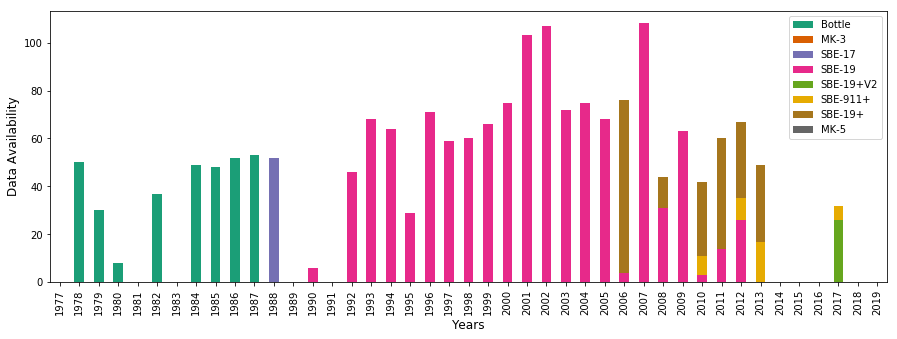

In [173]:
ax.set_xlim(1975, 2020)
ax = dftotal.plot(kind="bar", stacked=True, cmap = 'Dark2') #tab10
plt.gcf().set_size_inches(15, 5)
# plt.title('Data Collection Methods', fontsize = 20)
plt.xlabel('Years',fontsize=12); plt.ylabel('Data Availability',fontsize=12)
ax.legend(bbox_to_anchor=(1, 1))
plt.savefig('datacollection_count_winterSMAB')
plt.show()

In [211]:
for year in range(1977,2020):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; p_intermediate = []; t_intermediate = []; yd_intermediate = []
    seasonyeardepth = []; seasonyeartemp = []
        
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        floordepth = npfile[i]['depth']
        if yd >= 0 and yd <= 31:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if polygon_v.contains(point) == True:
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'lat': month_df['t'].iloc[ii]}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            l=[i for i in df_final[0] if i<=6]
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for ii in range(len(l)):
                    val = df_final[1][ii]
                    numrange.append(ii)
                    surfaceval.append(val)
            surfacevalmean = statistics.mean(surfaceval)
            tempfin = []
            pressurefin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
            d = {'temp': list(reversed(tempfin)), 'pressure': list(reversed(pressurefin))}
            dffin = pd.DataFrame(d)
            pnew = []; allmixedcount = []
            inconclusivecount = []
            for i in range(len(dffin)):
                b = dffin.at[i,'temp']
                if b <= (surfacevalmean + 0.2) and b >= (surfacevalmean - 0.2):
                    if dffin.at[i,'pressure'] >= floordepth - 6:
                        seasonyeartemp.append(dffin.at[i,'temp'])
                        seasonyeardepth.append(dffin.at[i,'pressure'])
                    else:
                        pnew.append(dffin.at[i,'pressure'])
                        seasonyeartemp.append(dffin.at[i,'temp'])
                        seasonyeardepth.append(dffin.at[i,'pressure'])
                        np.array(seasonyeartemp)
                        np.array(seasonyeardepth)
                    break  
    monthly = []
    if len(seasonyeartemp) > 0:
        print('depth_',year,np.mean(seasonyeardepth))

depth_ 1985 196.0
depth_ 1986 35.82692307692308
depth_ 1987 27.566037735849058
depth_ 1988 30.96078431372549
depth_ 1990 27.833333333333332
depth_ 1993 34.833333333333336
depth_ 2001 46.07142857142857
depth_ 2005 29.625
depth_ 2006 94.25
depth_ 2007 42.5
depth_ 2008 38.04545454545455
depth_ 2009 57.2972972972973
depth_ 2011 97.06666666666666
depth_ 2012 83.65217391304348


In [215]:
january = statistics.mean([196.0,35.82692307692308,27.566037735849058,30.96078431372549,27.833333333333332,
          34.833333333333336,46.07142857142857,29.625,94.25,42.5,38.04545454545455,57.2972972972973,97.06666666666666,83.65217391304348])
february = statistics.mean([21.5,15.571428571428571,45.5,26.163265306122447,32.34782608695652,39.58695652173913,40.75806451612903,
                           34.725806451612904,34.75,32.65217391304348,28.275862068965516,36.37931034482759,30.630769230769232,
                           54.18666666666667,50.258426966292134,36.89320388349515,58.84285714285714,69.09333333333333,50.233333333333334,
                           38.929577464788736,49.58024691358025,21.4,40.42857142857143,23.933333333333334,39.55,34.8125,43.12903225806452])
march = statistics.mean([21.28,39.9,28.691358024691358,19.068181818181817,28.58823529411765,28.49206349206349,29.31081081081081,
                        28.885057471264368,37.214285714285715,23.617977528089888,25.78787878787879,34.62921348314607,
                        29.714285714285715,29.876712328767123,33.66216216216216,38.75555555555555,31.970149253731343,34.79012345679013,
                        31.725490196078432,24.146341463414632])
april = statistics.mean([17.023809523809526,13.326923076923077,10.666666666666666,15.857142857142858,26.0,36.06666666666667,
                        21.0,55.26923076923077,40.68539325842696,50.4375,40.90909090909091])
may = statistics.mean([18.142857142857142,10.585365853658537,6.115384615384615,5.0,7.3125,
                       10.6875,13.254901960784315,16.22222222222222,12.127450980392156,7.0,
                       36.8,8.444444444444445,7.769230769230769,18.823529411764707,15.742857142857142,
                       13.642857142857142,8.1,21.612903225806452,59.44444444444444,9.044444444444444,
                       10.712121212121213,11.555555555555555,10.216216216216216,21.296296296296298,13.785714285714286,
                       18.181818181818183,27.56])
june = statistics.mean([5.481481481481482,4.590909090909091,7.428571428571429,6.137931034482759,
                        7.583333333333333,12.0,7.84,10.0,9.0,9.0,8.428571428571429,6.0,
                        10.666666666666666,8.0,6.166666666666667,10.473684210526315,7.074074074074074,
                        8.61111111111111,10.382352941176471,8.733333333333333,9.616666666666667])
july = statistics.mean([5.59375,7.261904761904762,7.0,8.5,12.0,9.525925925925925,
                        8.290322580645162,9.652173913043478,9.628571428571428,7.848484848484849,
                        10.6,7.0,8.333333333333334,6.5,8.029411764705882,8.35593220338983,
                        8.444444444444445,8.26086956521739,6.5,7.444444444444445,
                        7.666666666666667,10.0])
august = statistics.mean([3.877551020408163,5.423076923076923,8.490196078431373,9.666666666666666,
                          11.904761904761905,9.646153846153846,10.461538461538462,9.173913043478262,
                          8.931818181818182,9.673913043478262,10.235294117647058,8.298076923076923,
                          11.542857142857143,7.363636363636363,10.07843137254902,7.333333333333333,
                          10.357142857142858,12.18421052631579,13.666666666666666,9.016129032258064,
                          8.304347826086957,10.17142857142857,7.785714285714286,8.705882352941176,
                          9.088235294117647,7.190476190476191,9.222222222222221])
september = statistics.mean([12.961538461538462,8.976190476190476,11.766666666666667,12.921052631578947,
                             14.076923076923077,11.686567164179104,14.76923076923077,17.84375,12.8125,
                             13.569620253164556,13.61111111111111,19.397058823529413,14.78688524590164,
                             13.707317073170731,12.666666666666666,11.88888888888889,13.381578947368421,
                             13.727272727272727,16.170731707317074,16.088607594936708,12.053333333333333,
                             17.10810810810811,16.51685393258427,20.691176470588236,14.686868686868687,
                             14.88888888888889,19.65686274509804,13.5,14.784810126582279,11.76388888888889,16.17241379310345])
october = statistics.mean([25.583333333333332,35.0,33.1,25.0,
                           27.413793103448278,22.0,31.86842105263158])
november = statistics.mean([29.389830508474578,43.8235294117647,20.379310344827587,33.294117647058826,
                            39.0625,33.51282051282051,29.15,35.853658536585364,
                            31.59090909090909,36.02272727272727,25.545454545454547,29.842105263157894])
# december = statistics.mean([])

In [216]:
januarys = statistics.stdev([196.0,35.82692307692308,27.566037735849058,30.96078431372549,27.833333333333332,
          34.833333333333336,46.07142857142857,29.625,94.25,42.5,38.04545454545455,57.2972972972973,97.06666666666666,83.65217391304348])
februarys = statistics.stdev([21.5,15.571428571428571,45.5,26.163265306122447,32.34782608695652,39.58695652173913,40.75806451612903,
                           34.725806451612904,34.75,32.65217391304348,28.275862068965516,36.37931034482759,30.630769230769232,
                           54.18666666666667,50.258426966292134,36.89320388349515,58.84285714285714,69.09333333333333,50.233333333333334,
                           38.929577464788736,49.58024691358025,21.4,40.42857142857143,23.933333333333334,39.55,34.8125,43.12903225806452])
marchs = statistics.stdev([21.28,39.9,28.691358024691358,19.068181818181817,28.58823529411765,28.49206349206349,29.31081081081081,
                        28.885057471264368,37.214285714285715,23.617977528089888,25.78787878787879,34.62921348314607,
                        29.714285714285715,29.876712328767123,33.66216216216216,38.75555555555555,31.970149253731343,34.79012345679013,
                        31.725490196078432,24.146341463414632])
aprils = statistics.stdev([17.023809523809526,13.326923076923077,10.666666666666666,15.857142857142858,26.0,36.06666666666667,
                        21.0,55.26923076923077,40.68539325842696,50.4375,40.90909090909091])
mays = statistics.stdev([18.142857142857142,10.585365853658537,6.115384615384615,5.0,7.3125,
                       10.6875,13.254901960784315,16.22222222222222,12.127450980392156,7.0,
                       36.8,8.444444444444445,7.769230769230769,18.823529411764707,15.742857142857142,
                       13.642857142857142,8.1,21.612903225806452,59.44444444444444,9.044444444444444,
                       10.712121212121213,11.555555555555555,10.216216216216216,21.296296296296298,13.785714285714286,
                       18.181818181818183,27.56])
junes = statistics.stdev([5.481481481481482,4.590909090909091,7.428571428571429,6.137931034482759,
                        7.583333333333333,12.0,7.84,10.0,9.0,9.0,8.428571428571429,6.0,
                        10.666666666666666,8.0,6.166666666666667,10.473684210526315,7.074074074074074,
                        8.61111111111111,10.382352941176471,8.733333333333333,9.616666666666667])
julys = statistics.stdev([5.59375,7.261904761904762,7.0,8.5,12.0,9.525925925925925,
                        8.290322580645162,9.652173913043478,9.628571428571428,7.848484848484849,
                        10.6,7.0,8.333333333333334,6.5,8.029411764705882,8.35593220338983,
                        8.444444444444445,8.26086956521739,6.5,7.444444444444445,
                        7.666666666666667,10.0])
augusts = statistics.stdev([3.877551020408163,5.423076923076923,8.490196078431373,9.666666666666666,
                          11.904761904761905,9.646153846153846,10.461538461538462,9.173913043478262,
                          8.931818181818182,9.673913043478262,10.235294117647058,8.298076923076923,
                          11.542857142857143,7.363636363636363,10.07843137254902,7.333333333333333,
                          10.357142857142858,12.18421052631579,13.666666666666666,9.016129032258064,
                          8.304347826086957,10.17142857142857,7.785714285714286,8.705882352941176,
                          9.088235294117647,7.190476190476191,9.222222222222221])
septembers = statistics.stdev([12.961538461538462,8.976190476190476,11.766666666666667,12.921052631578947,
                             14.076923076923077,11.686567164179104,14.76923076923077,17.84375,12.8125,
                             13.569620253164556,13.61111111111111,19.397058823529413,14.78688524590164,
                             13.707317073170731,12.666666666666666,11.88888888888889,13.381578947368421,
                             13.727272727272727,16.170731707317074,16.088607594936708,12.053333333333333,
                             17.10810810810811,16.51685393258427,20.691176470588236,14.686868686868687,
                             14.88888888888889,19.65686274509804,13.5,14.784810126582279,11.76388888888889,16.17241379310345])
octobers = statistics.stdev([25.583333333333332,35.0,33.1,25.0,
                           27.413793103448278,22.0,31.86842105263158])
novembers = statistics.stdev([29.389830508474578,43.8235294117647,20.379310344827587,33.294117647058826,
                            39.0625,33.51282051282051,29.15,35.853658536585364,
                            31.59090909090909,36.02272727272727,25.545454545454547,29.842105263157894])
# december = statistics.mean([])

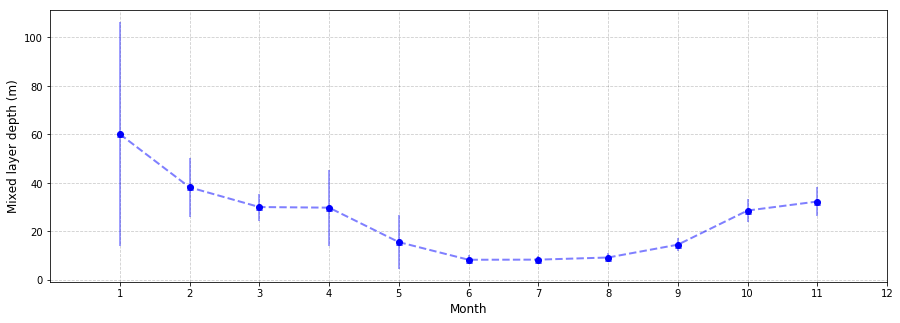

In [217]:
x = [1,2,3,4,5,6,7,8,9,10,11]
y = [january, february, march, april, may, june, july, august, september,october,november]
e = [januarys, februarys, marchs, aprils, mays, junes, julys, augusts, septembers,octobers,novembers]


plt.figure(figsize=(15, 5))
plt.xlim((0,12))
# plt.ylim((0,65))
plt.scatter(x, y, marker='o', c='blue')
plt.plot(x,y,linewidth = 2.0, linestyle = '--', c='blue', alpha = 0.5)
# # plt.title('Spring (AMJ) Mixed Layer Depth in Southern MAB', fontsize = 15)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Mixed layer depth (m)', fontsize = 12)
plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12]) 
plt.errorbar(x, y, e, linestyle='None', marker='^',color='blue',alpha= 0.5)
# plt.yticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65])
plt.savefig('timeseries_MLDLD_SouthernMAB')
plt.show()

In [36]:
filelen = []
Bottles = []; MK3 = []
SBE17 = []; SBE19 = []
MK5 = []; SBE19V2 = []
SBE911 = []; SBE19plus = []

for year in range(1977,2020):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; yd_intermediate = [];gear_intermediate = []
    Bottles_intermediate = []; MK3_intermediate = []
    SBE17_intermediate = []; SBE19_intermediate = []
    MK5_intermediate = []; SBE19V2_intermediate = []
    SBE911_intermediate = []; SBE19plus_intermediate = []
        
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        gear = npfile[i]['gear']
#         if yd > 334 and yd <= 365 or yd >= 0 and yd <= 59:
        if yd > 334 and yd <= 365:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            yd_intermediate.append(npfile[i]['yd'])
            gear_intermediate.append(npfile[i]['gear'])
            
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'gear': gear_intermediate})
#     print(month_df)
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if polygon_v.contains(point) == True:
            a = month_df['gear'].iloc[ii]
#             print(a)
            if a == 'Bottle':
                Bottles_intermediate.append(i)
            if a == 'MK-3':
                MK3_intermediate.append(i)
            if a == 'SBE-17':
                SBE17_intermediate.append(i)
            if a == 'SBE-19':
                SBE19_intermediate.append(i)
            if a == 'MK-5':
                MK5_intermediate.append(i)
            if a == 'SBE-19+V2':
                SBE19V2_intermediate.append(i)
            if a == 'SBE-911+':
                SBE911_intermediate.append(i)
            if a == 'SBE-19+':
                SBE19plus_intermediate.append(i)
    Bottles.append(len(Bottles_intermediate))
    MK3.append(len(MK3_intermediate))
    SBE17.append(len(SBE17_intermediate))
    SBE19.append(len(SBE19_intermediate))
    MK5.append(len(MK5_intermediate))
    SBE19V2.append(len(SBE19V2_intermediate))
    SBE911.append(len(SBE911_intermediate))
    SBE19plus.append(len(SBE19plus_intermediate))

In [37]:
years = [1977,1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [38]:
df = pd.DataFrame(index=years, 
                  data={'Bottle': Bottles,'MK-3': MK3, 
                        'SBE-17': SBE17,'SBE-19': SBE19,
                        'SBE-19+V2': SBE19V2,'SBE-911+': SBE911,
                        'SBE-19+': SBE19plus,'MK-5': MK5})

In [39]:
print(df['Bottle'].sum())
print(df['MK-3'].sum())
print(df['SBE-17'].sum())
print(df['SBE-19'].sum())
print(df['SBE-19+V2'].sum())
print(df['SBE-911+'].sum())
print(df['SBE-19+'].sum())
print(df['MK-5'].sum())

44
0
0
0
0
0
0
0


In [50]:
Bottlemonth = [106, 177, 204, 160, 310, 136, 85, 180, 104, 151, 260, 44]
MK3month = [0, 0, 0, 0, 132, 86, 0, 118, 0, 0, 14, 0]
SBE17month = [52, 0, 0, 0, 43, 0, 0, 52, 0, 0, 45, 0]
SBE19month = [146, 1072, 1500, 22, 231, 239, 666, 468, 1221, 129, 171, 0]
SBE19V2month = [0, 26, 235, 53, 141, 60, 6, 91, 94, 50, 90, 0]
SBE911plusmonth = [0, 40, 248, 98, 201, 107, 36, 100, 328, 18, 58, 0]
SBE19plusmonth = [53, 173, 467, 36, 137, 176, 130, 253, 706, 26, 286, 0]
MK5month = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [52]:
print(len(SBE19plusmonth))

12


In [53]:
dfmonth = pd.DataFrame(index=[1,2,3,4,5,6,7,8,9,10,11,12], 
                  data={'Bottle': Bottlemonth,'MK-3': MK3month, 
                        'SBE-17': SBE17month,'SBE-19': SBE19month,
                        'SBE-19+V2': SBE19V2month,'SBE-911+': SBE911plusmonth,
                        'SBE-19+': SBE19plusmonth,'MK-5': MK5month})

In [ ]:
# print(dfmonth)

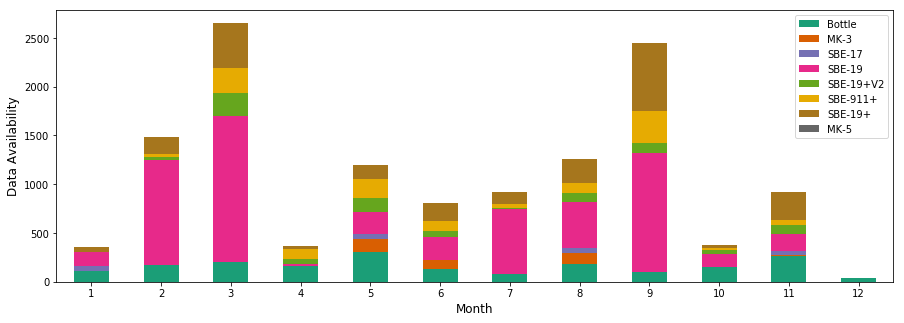

In [54]:
ax = dfmonth.plot(kind="bar", stacked=True, cmap = 'Dark2') #tab10
plt.gcf().set_size_inches(15, 5)
# plt.title('Data Collection Methods', fontsize = 20)
plt.xticks(rotation = 360)
plt.xlabel('Month',fontsize=12); plt.ylabel('Data Availability',fontsize=12)
ax.legend(bbox_to_anchor=(1, 1))
plt.savefig('ANNUALtrend_datacollection_count')
plt.show()

In [178]:
depth_1978 = statistics.mean([21.5,20.0])
depth_1979 = statistics.mean([15.571428571428571])

depth_1980 = statistics.mean([45.5,49.166666666666664])
# depth_1981 = statistics.mean([])
depth_1982 = statistics.mean([38.432432432432435])
# depth_1983 = statistics.mean([])
depth_1984 = statistics.mean([26.163265306122447])
depth_1985 = statistics.mean([196.0,32.34782608695652])
depth_1986 = statistics.mean([35.82692307692308])
depth_1987 = statistics.mean([27.566037735849058])
depth_1988 = statistics.mean([30.96078431372549])
# depth_1989 = statistics.mean([])

depth_1990 = statistics.mean([27.833333333333332])
# depth_1991 = statistics.mean([])
depth_1992 = statistics.mean([39.58695652173913])
depth_1993 = statistics.mean([34.833333333333336,40.75806451612903])
depth_1994 = statistics.mean([34.725806451612904])
depth_1995 = statistics.mean([34.75])
depth_1996 = statistics.mean([32.65217391304348])
depth_1997 = statistics.mean([28.275862068965516])
depth_1998 = statistics.mean([36.37931034482759])
depth_1999 = statistics.mean([30.630769230769232])

depth_2000 = statistics.mean([54.18666666666667])
depth_2001 = statistics.mean([46.07142857142857,50.258426966292134])
depth_2002 = statistics.mean([36.89320388349515])
depth_2003 = statistics.mean([58.84285714285714])
depth_2004 = statistics.mean([69.09333333333333])
depth_2005 = statistics.mean([29.625,50.233333333333334])
depth_2006 = statistics.mean([94.25,38.929577464788736])
depth_2007 = statistics.mean([42.5,49.58024691358025])
depth_2008 = statistics.mean([38.04545454545455])
depth_2009 = statistics.mean([57.2972972972973,21.4])

depth_2010 = statistics.mean([40.42857142857143])
depth_2011 = statistics.mean([97.06666666666666,23.933333333333334])
depth_2012 = statistics.mean([83.65217391304348,39.55])
depth_2013 = statistics.mean([34.8125])
# depth_2014 = statistics.mean([])
# depth_2015 = statistics.mean([])
# depth_2016 = statistics.mean([])
depth_2017 = statistics.mean([43.12903225806452])
# depth_2018 = statistics.mean([])
# depth_2019 = statistics.mean([])

best fit line:
y = -982.12 + 0.51x


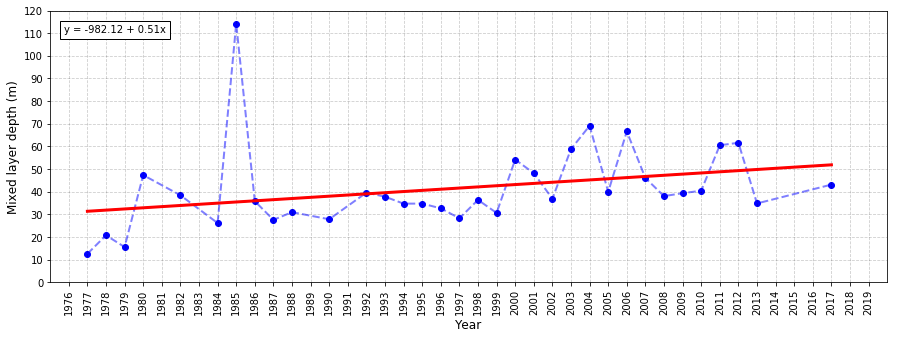

In [185]:
x = [1977, 1978, 1979, 1980, 1982, 1984, 1985, 1986, 1987, 
     1988, 1990, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 
     1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 
     2011, 2012,2013,2017]
y = [depth_1977,depth_1978,depth_1979,depth_1980,depth_1982,depth_1984,depth_1985,depth_1986,depth_1987,
    depth_1988,depth_1990,depth_1992,depth_1993,depth_1994,depth_1995,depth_1996,depth_1997,depth_1998,depth_1999,
    depth_2000,depth_2001,depth_2002,depth_2003,depth_2004, depth_2005,depth_2006,depth_2007,depth_2008,depth_2009,depth_2010,
    depth_2011,depth_2012,depth_2013,depth_2017]

plt.figure(figsize=(15, 5))
plt.xlim((1975,2020))
plt.ylim((0,120))
plt.scatter(x, y, marker='o', c='blue')
plt.plot(x,y,linewidth = 2.0, linestyle = '--', c='blue', alpha = 0.5)
# plt.title('Spring (AMJ) Mixed Layer Depth in Southern MAB', fontsize = 15)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Mixed layer depth (m)', fontsize = 12)
a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
plt.plot(x, yfit)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),c='red',linewidth = 3)
plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1976,1977,1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 
     1988, 1989,1990,1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 
     1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 
     2011, 2012,2013,2014,2015,2016,2017,2018,2019], rotation='vertical')
plt.yticks([0,10,20,30,40,50,60,70,80,90,100,110,120])
a = AnchoredText("y = -982.12 + 0.51x".format(3), loc=2, pad=0.4, borderpad=1)
plt.gca().add_artist(a)
plt.savefig('timeseries_winterMLDLD_SouthernMAB')
plt.show()